In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import torch

import FullRankRNN as rnn
import Reinforce as rln

iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90
iteration 100
iteration 110
iteration 120
iteration 130
iteration 140
iteration 150
iteration 160
iteration 170
iteration 180
iteration 190
iteration 200
iteration 210
iteration 220
iteration 230
iteration 240
iteration 250
iteration 260
iteration 270
iteration 280
iteration 290
iteration 300
iteration 310
iteration 320
iteration 330
iteration 340
iteration 350
iteration 360
iteration 370
iteration 380
iteration 390
iteration 400
iteration 410
iteration 420
iteration 430
iteration 440
iteration 450
iteration 460
iteration 470
iteration 480
iteration 490
iteration 500
iteration 510
iteration 520
iteration 530
iteration 540
iteration 550
iteration 560
iteration 570
iteration 580
iteration 590
iteration 600
iteration 610
iteration 620
iteration 630
iteration 640
iteration 650
iteration 660
iteration 670
iteration 680
iteration 690
iteration 700
iteration 710
iteration 720
i

/home/martina/Documenti/A_Tesi/Singing-birds/Reinforce.py:288: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25,5))
/home/martina/Documenti/A_Tesi/Singing-birds/Reinforce.py:288: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25,5))
/home/martina/Documenti/A_Tesi/Singing-birds/Reinforce.py:288: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

It took 657.66 m for 1500 iterations

It took 25.51 s on average for each 50-trails iteration



findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


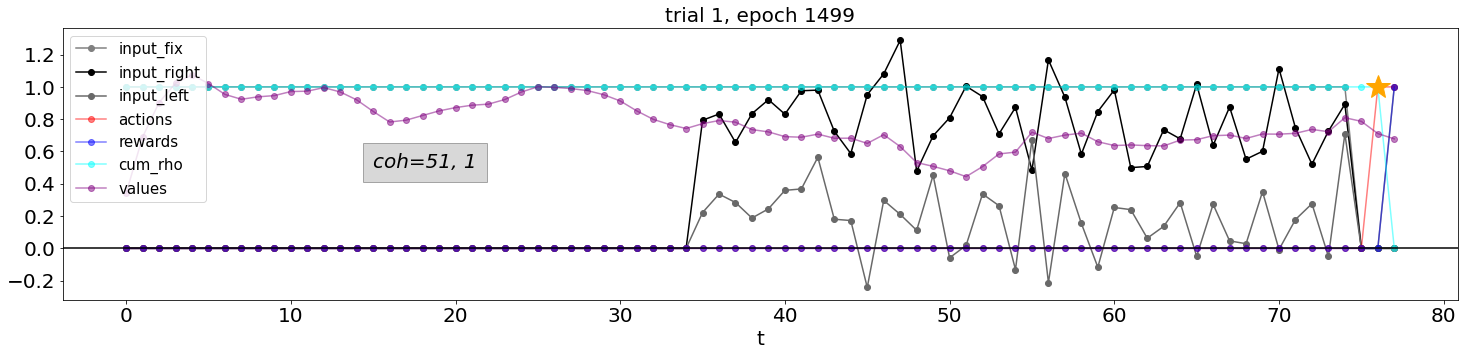

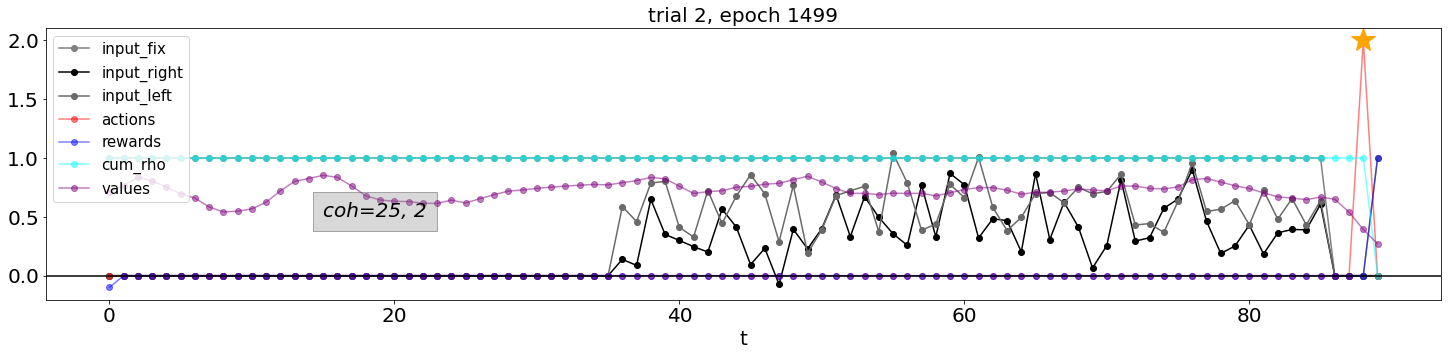

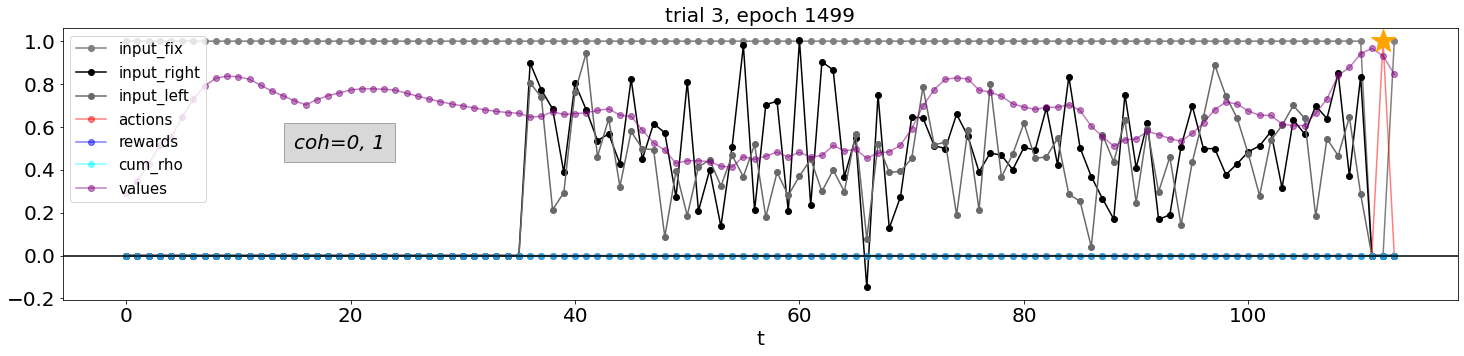

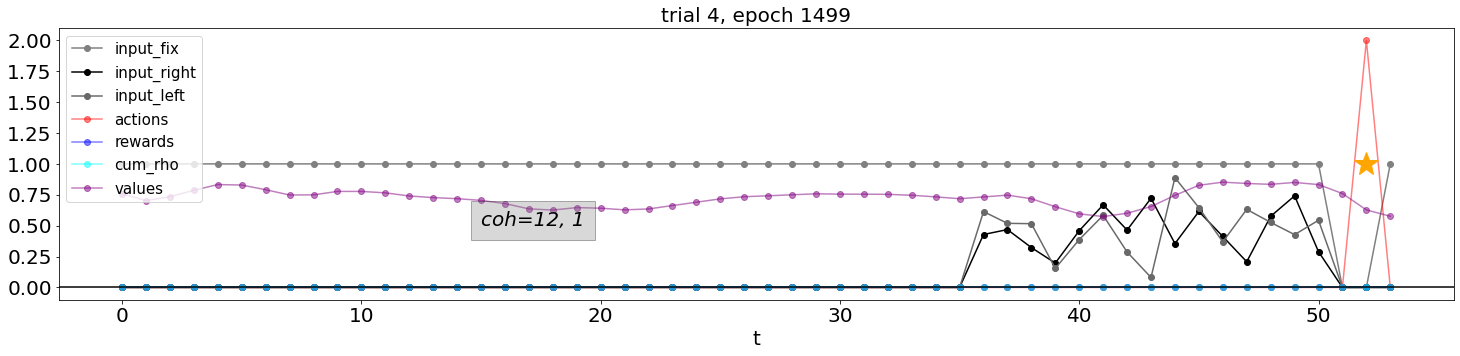

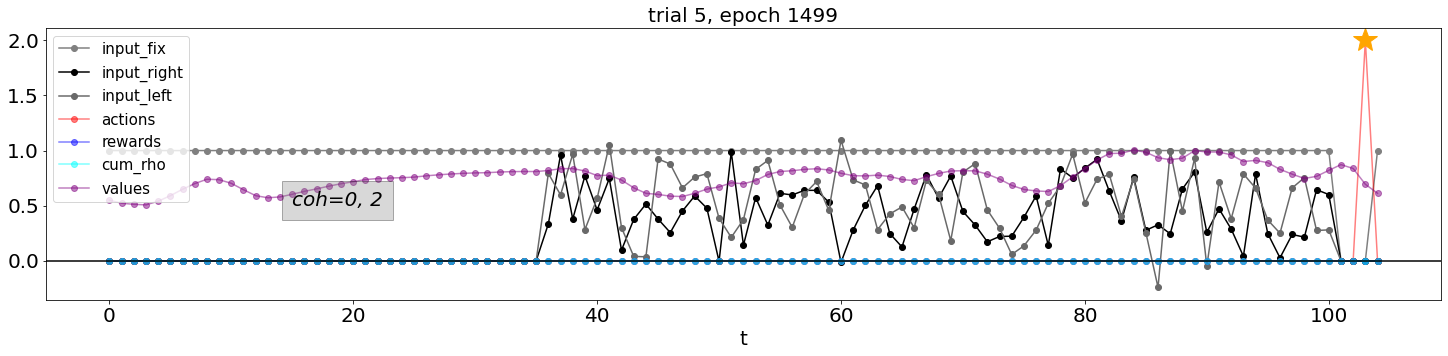

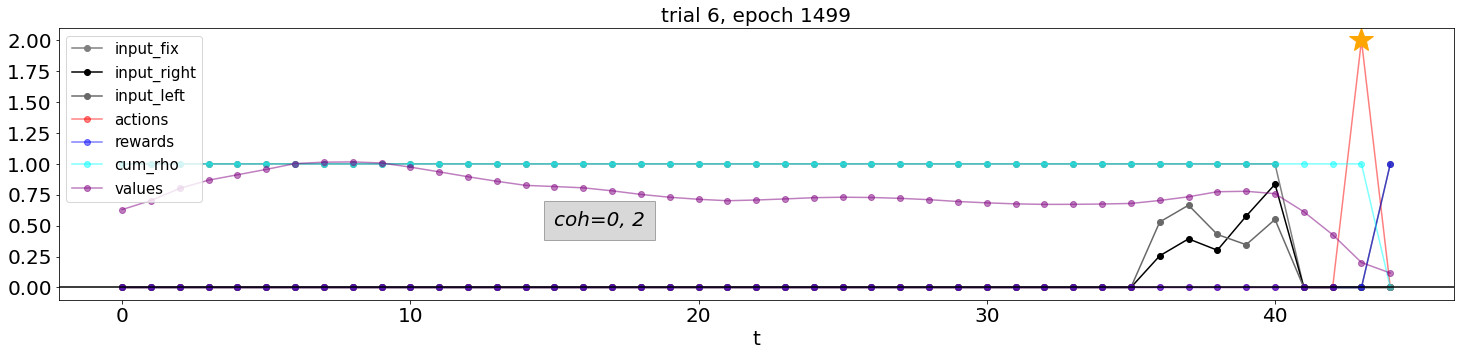

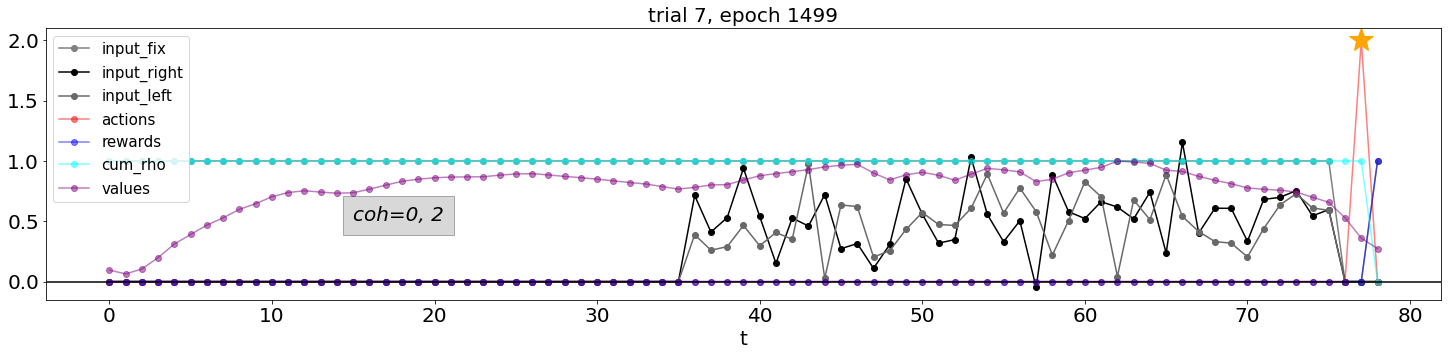

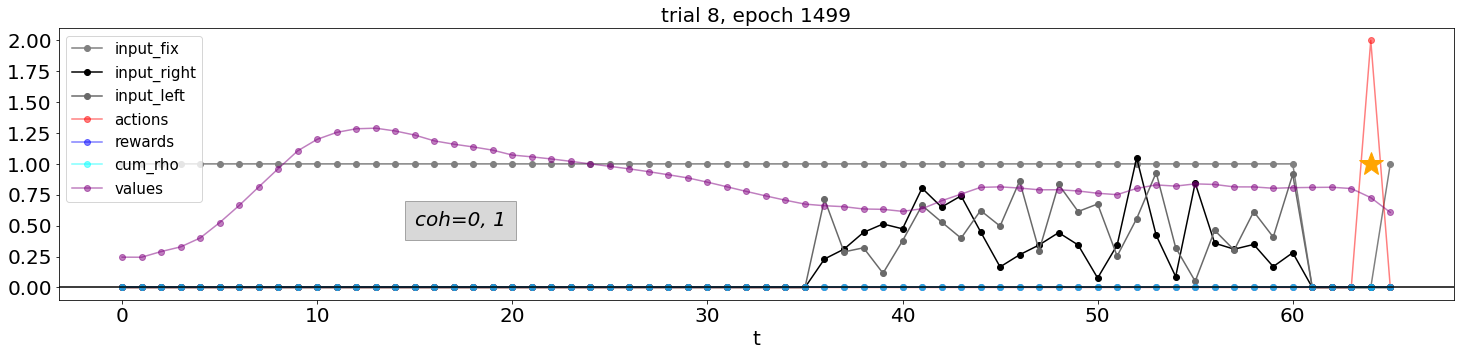

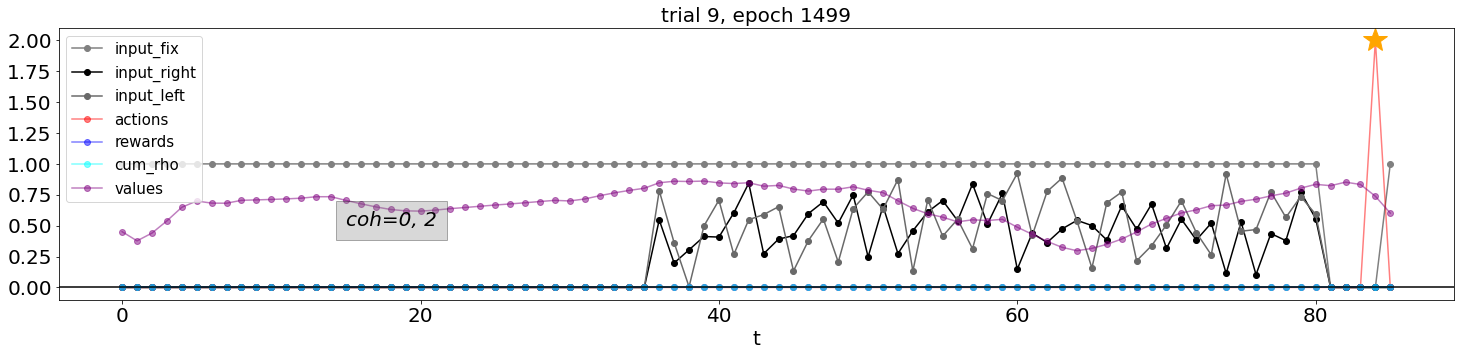

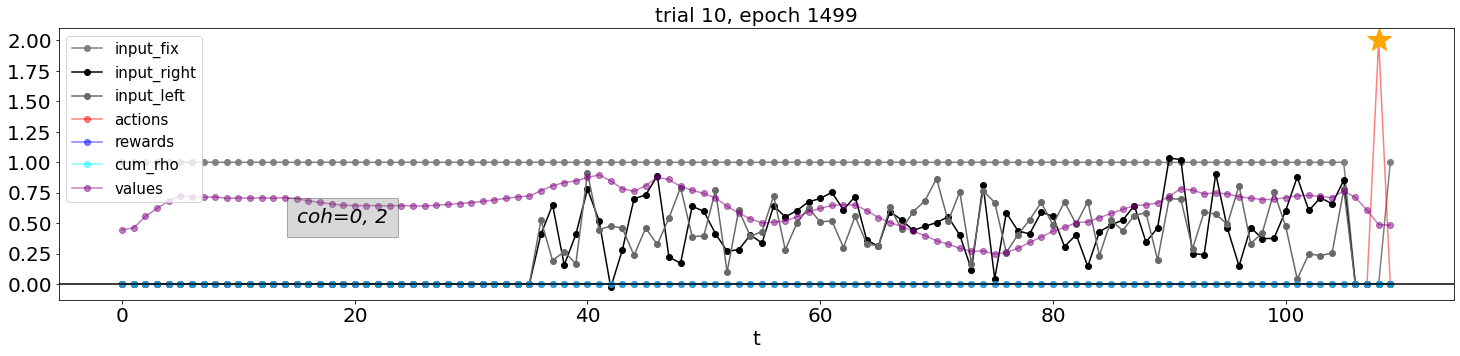

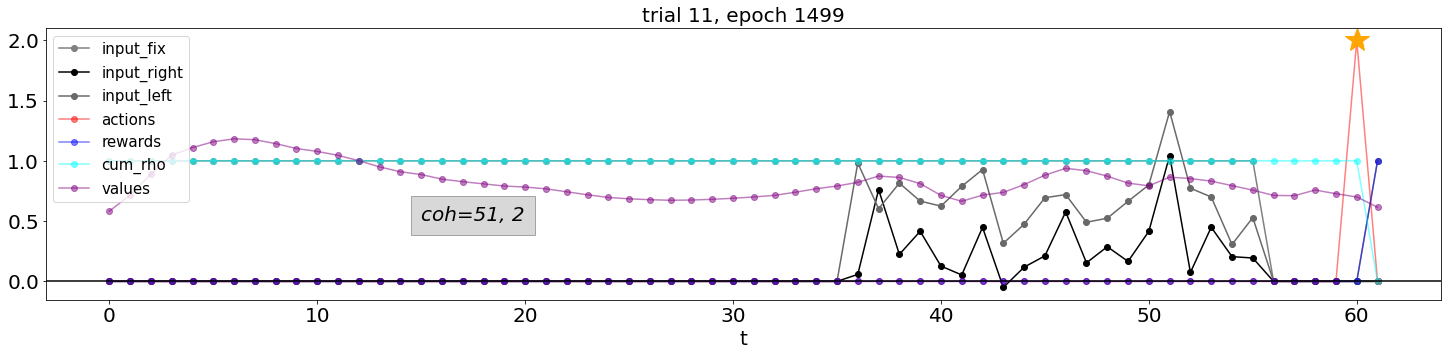

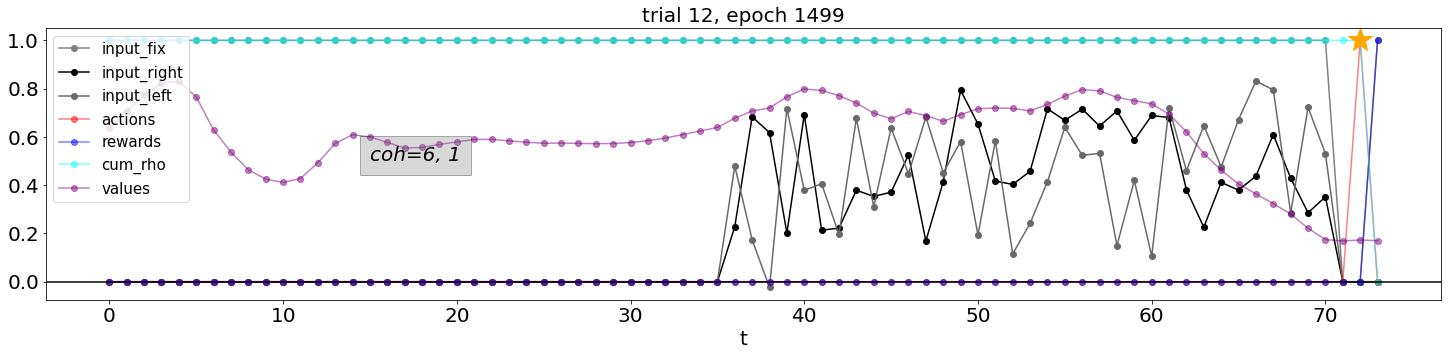

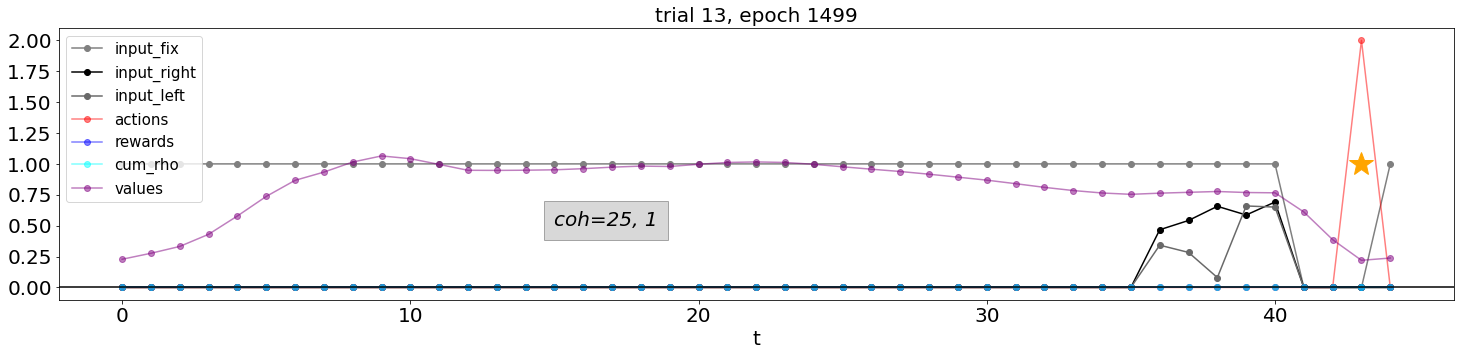

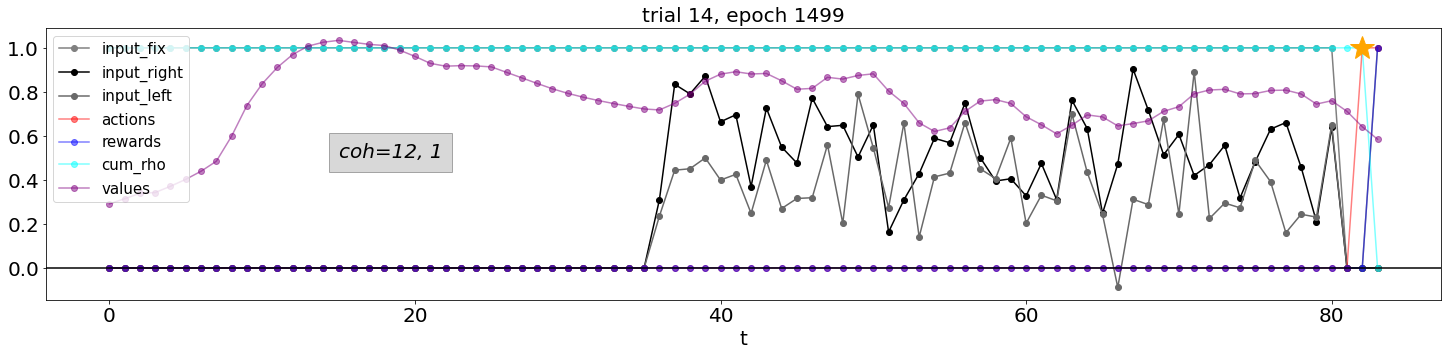

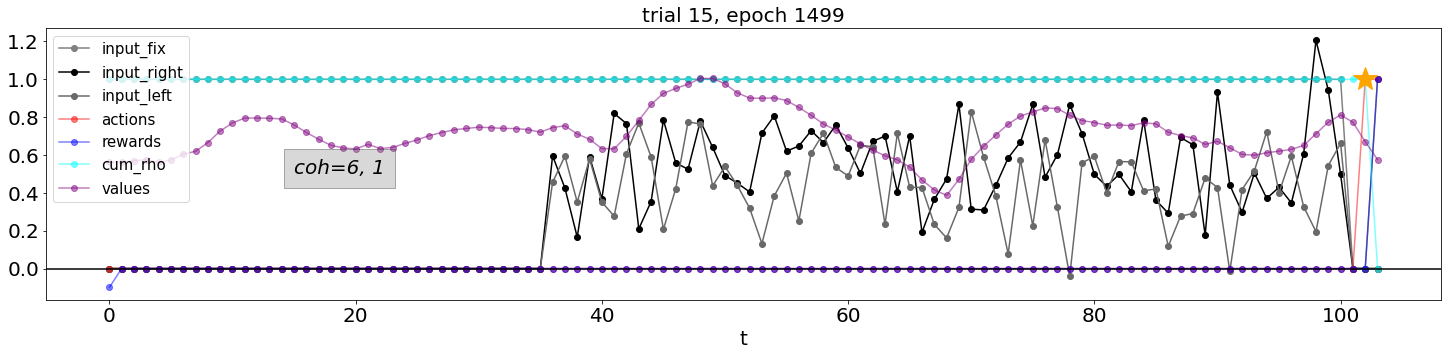

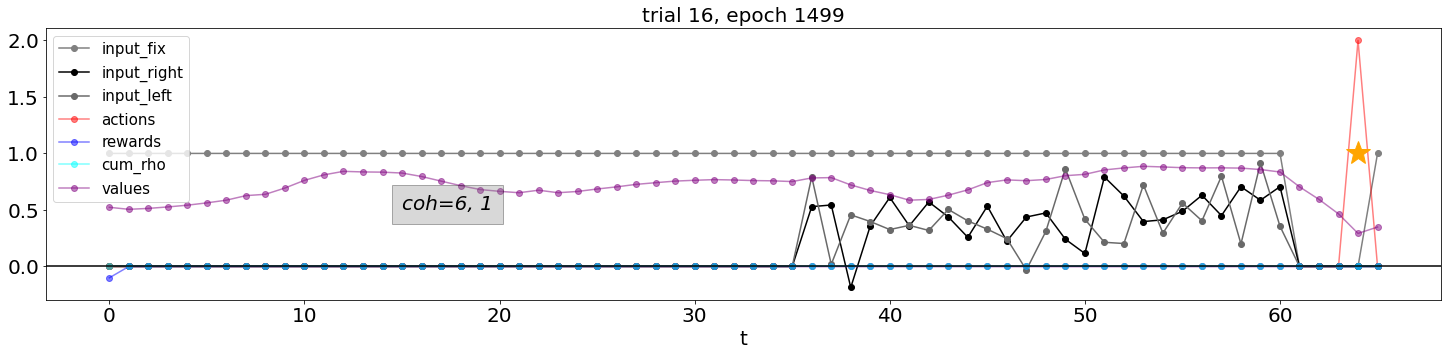

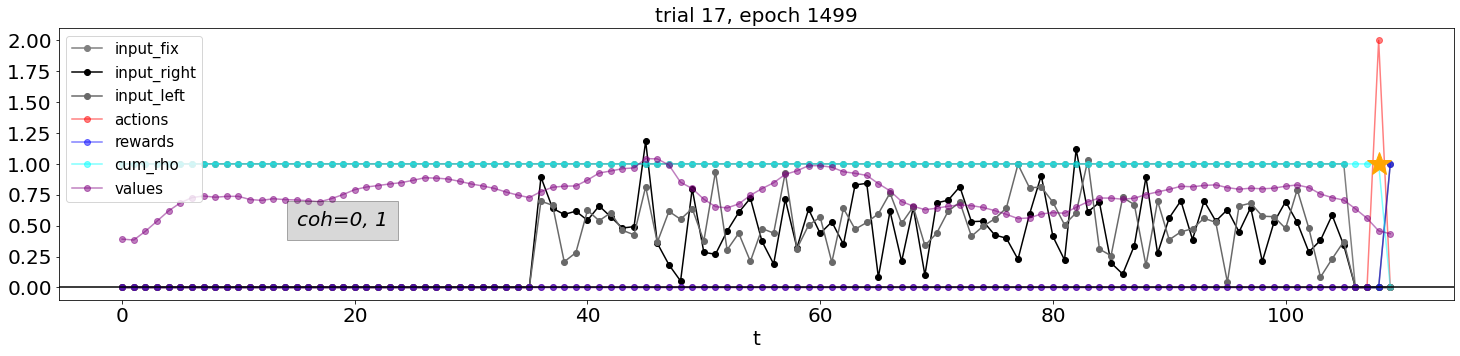

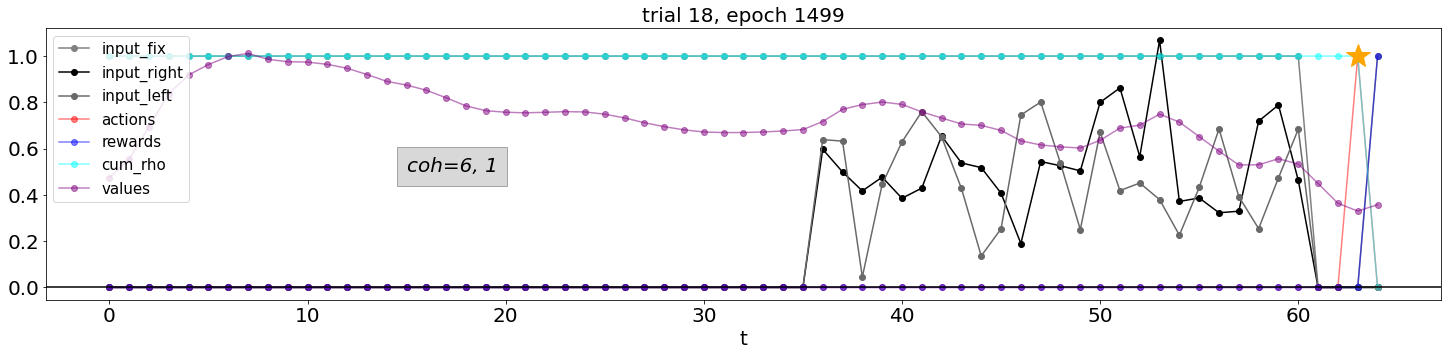

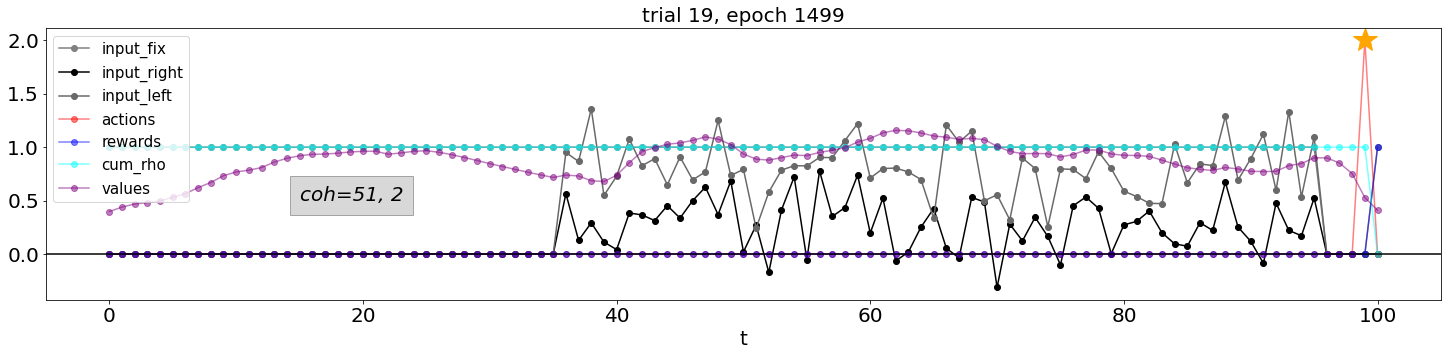

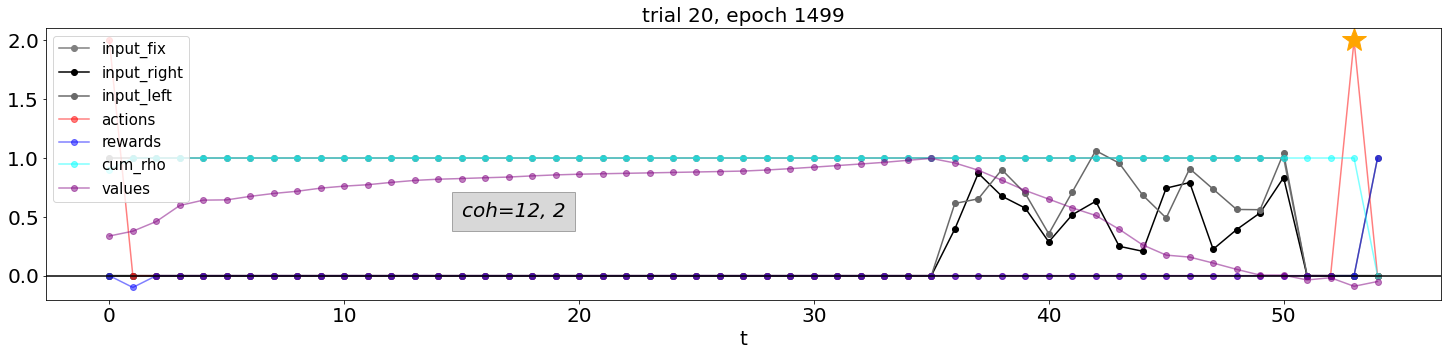

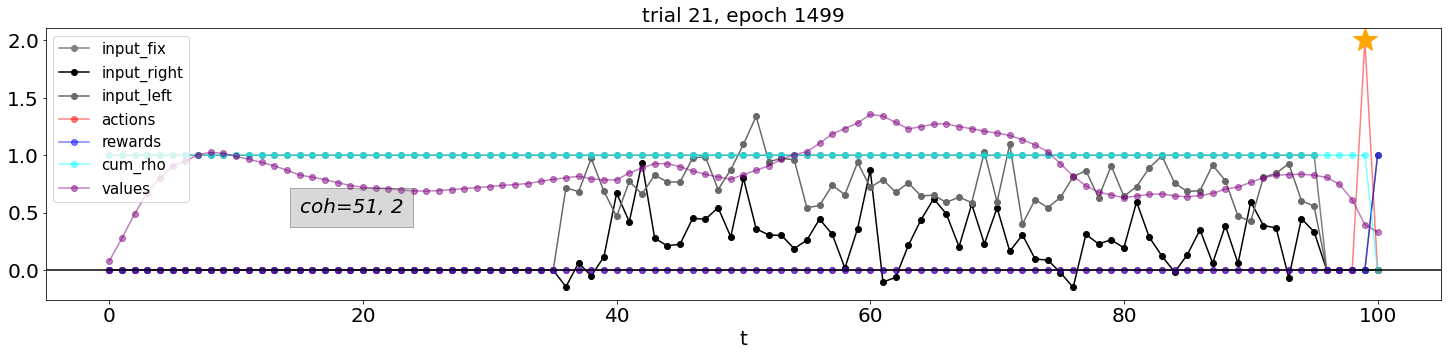

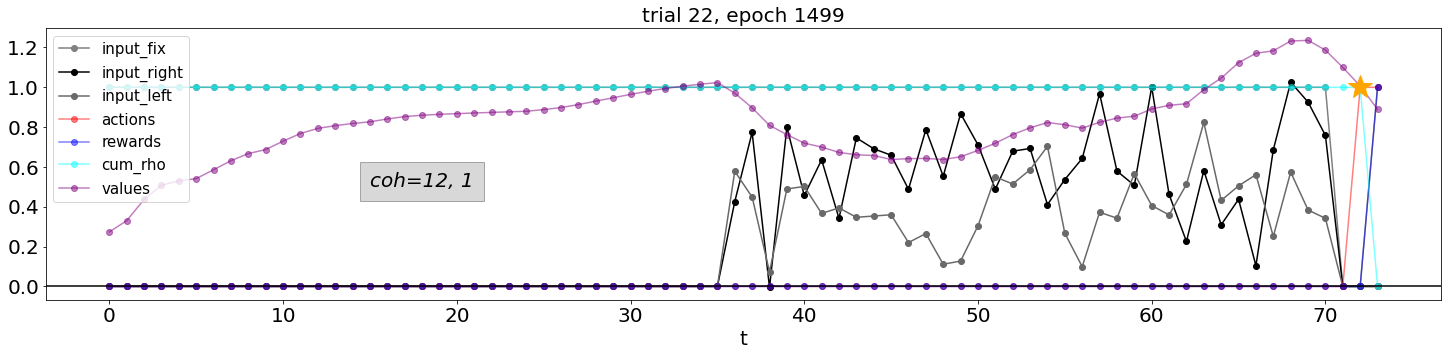

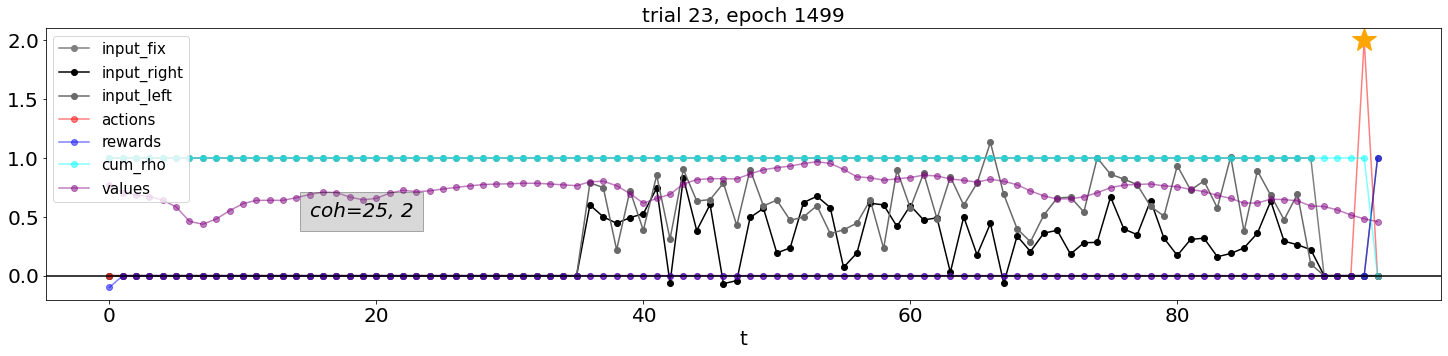

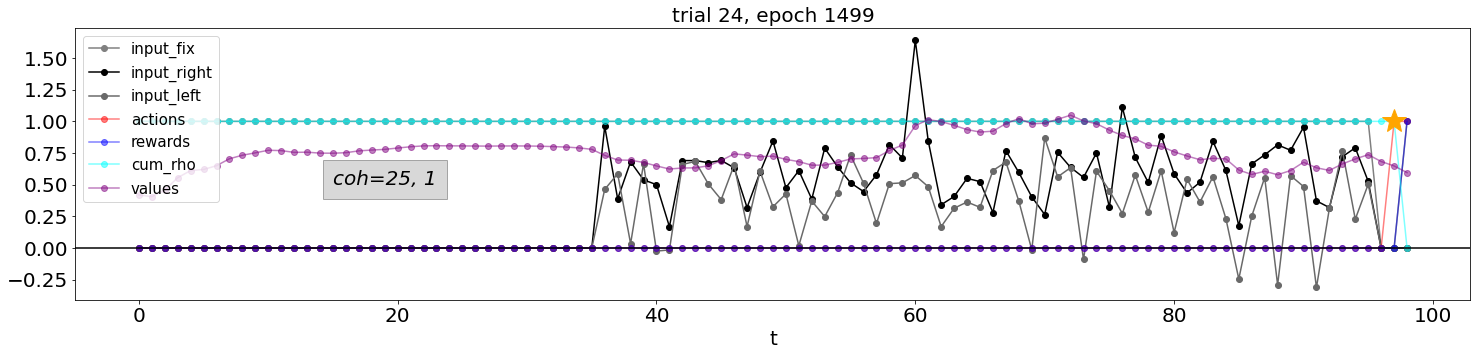

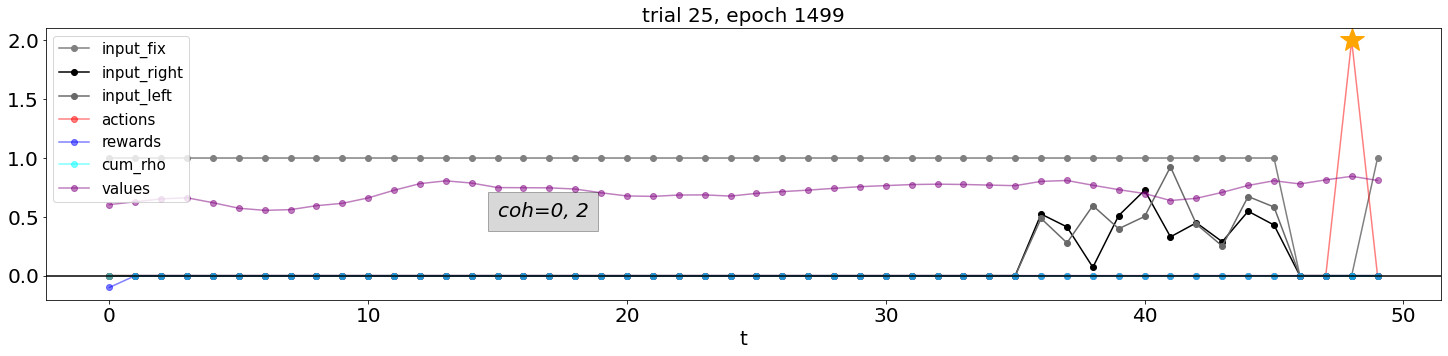

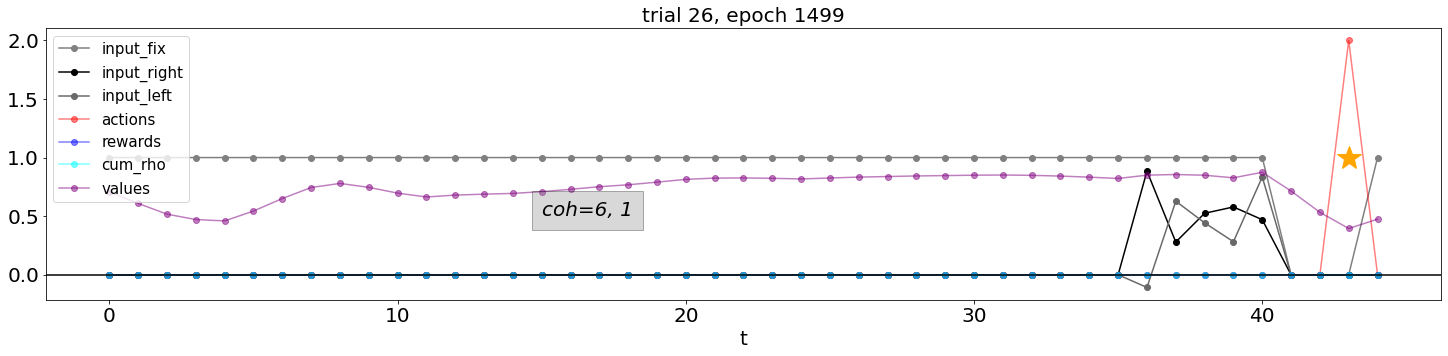

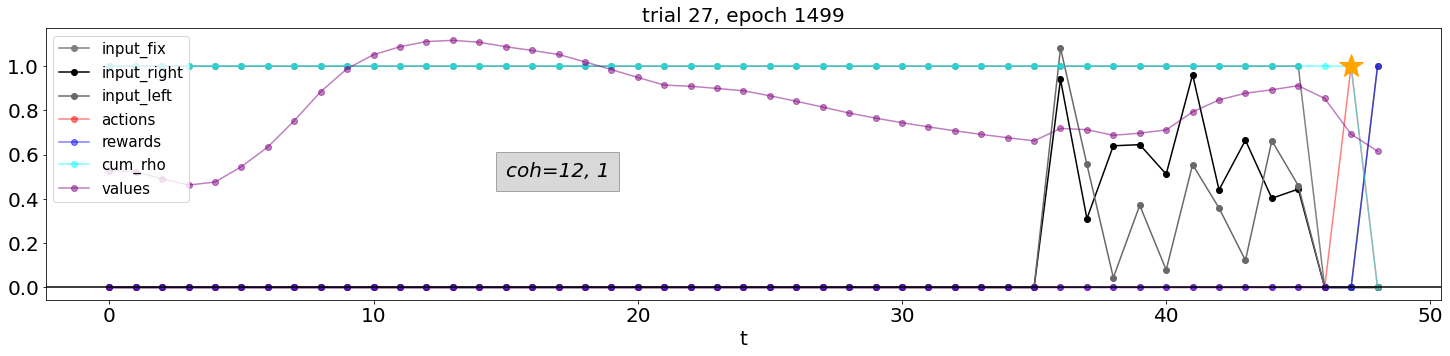

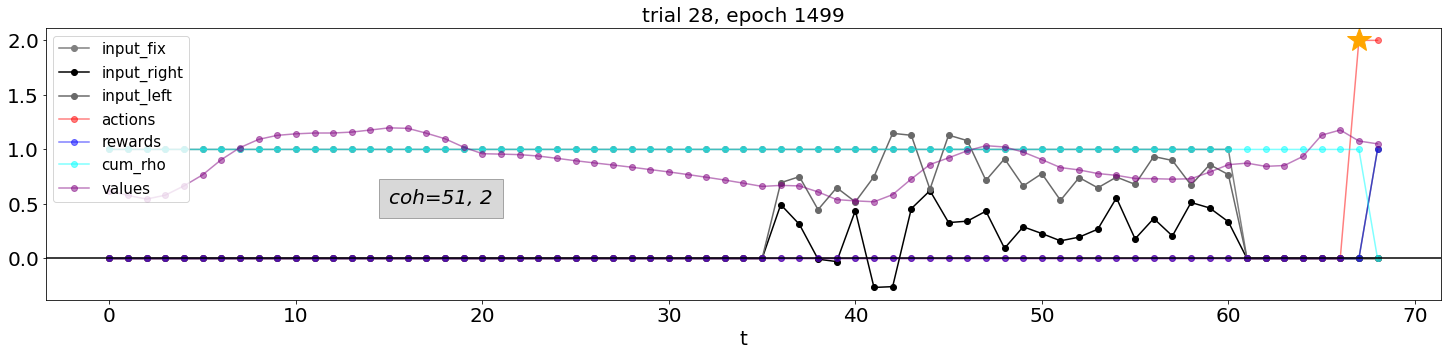

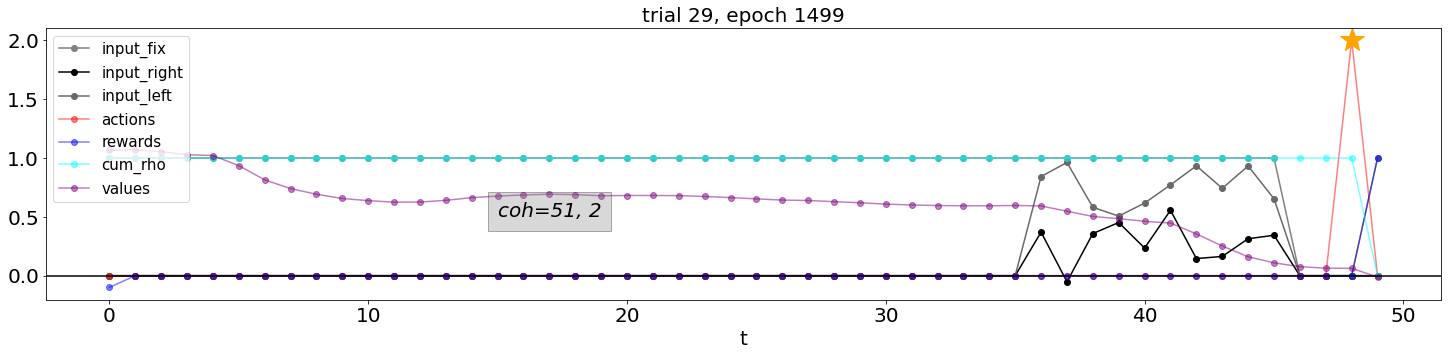

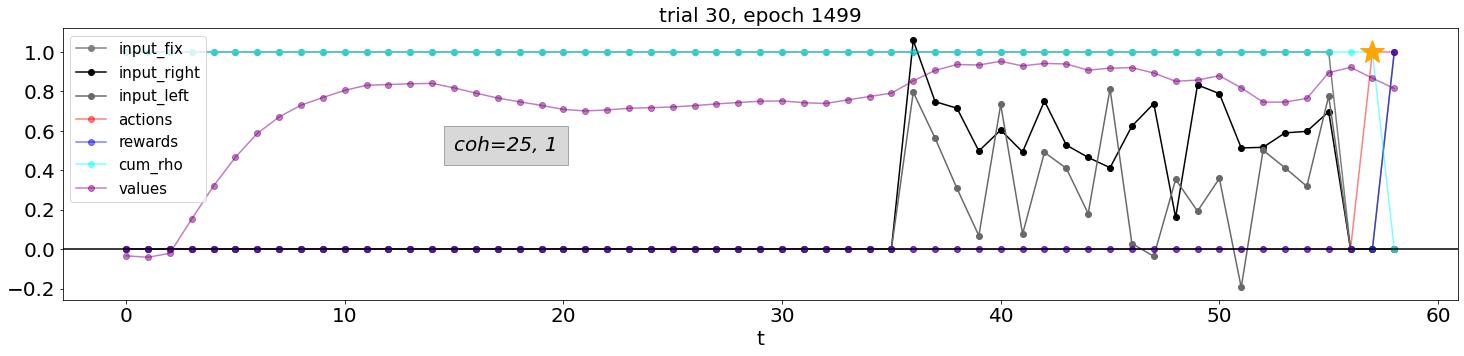

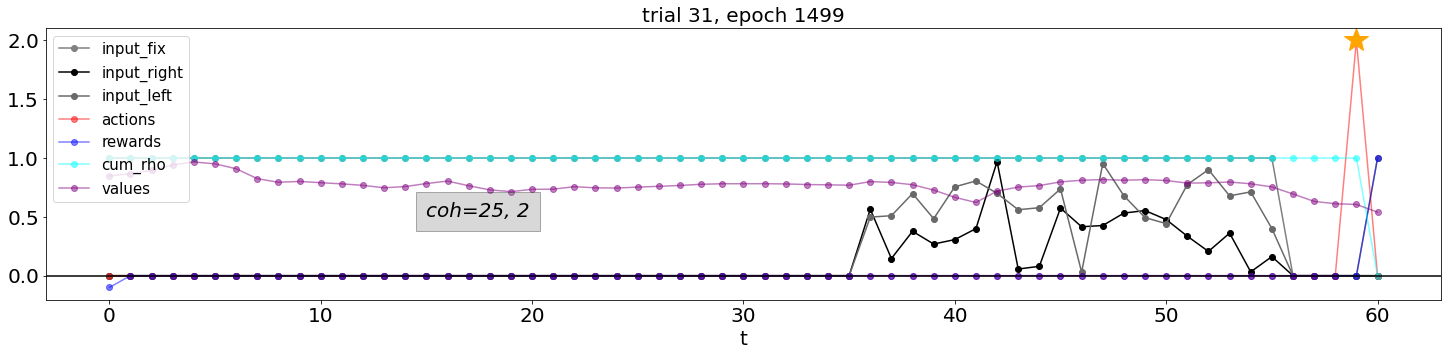

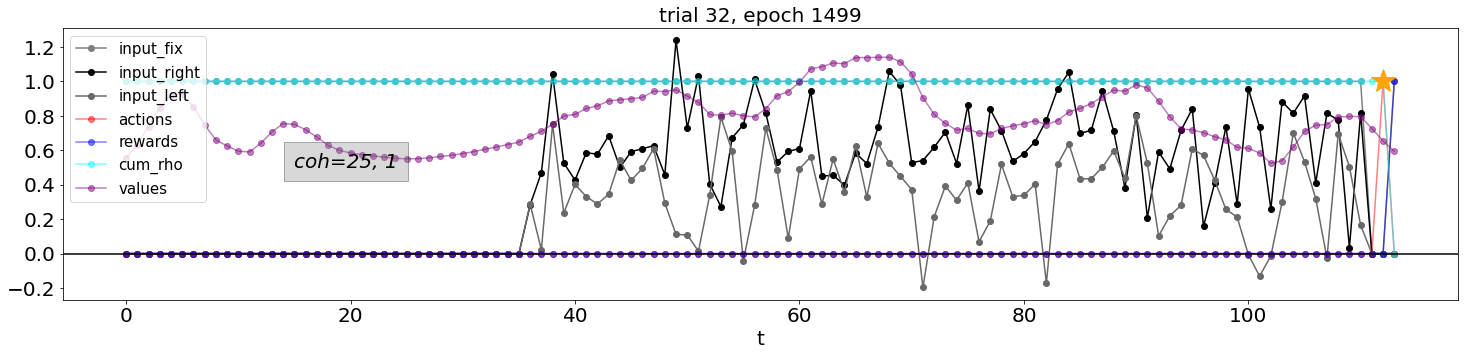

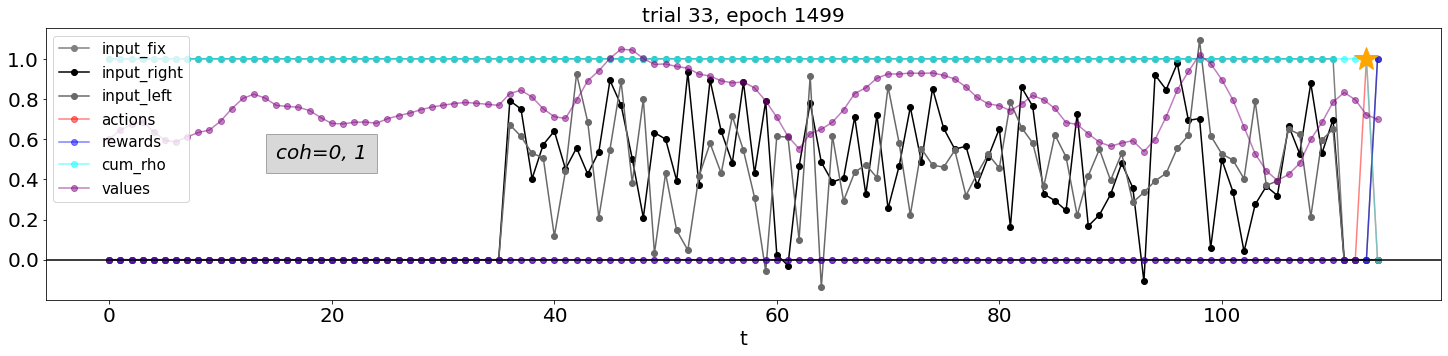

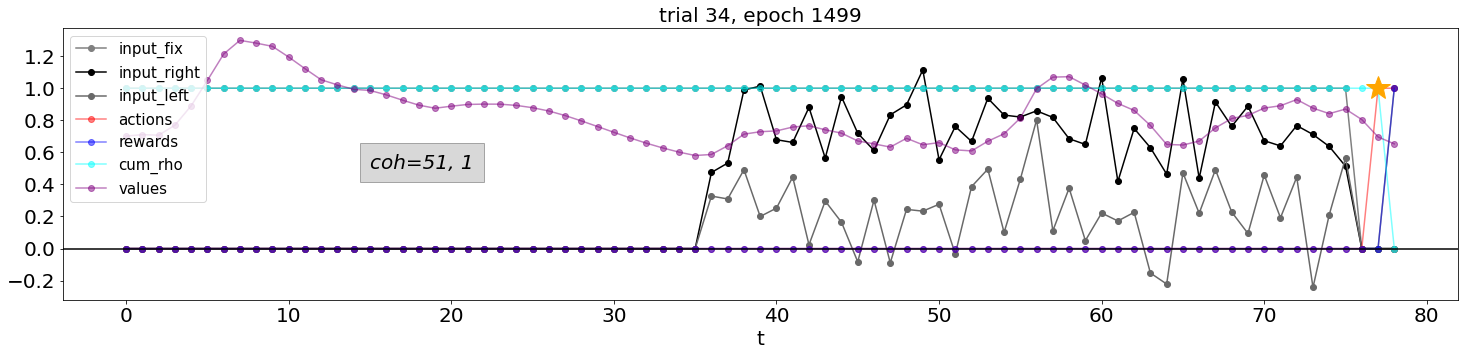

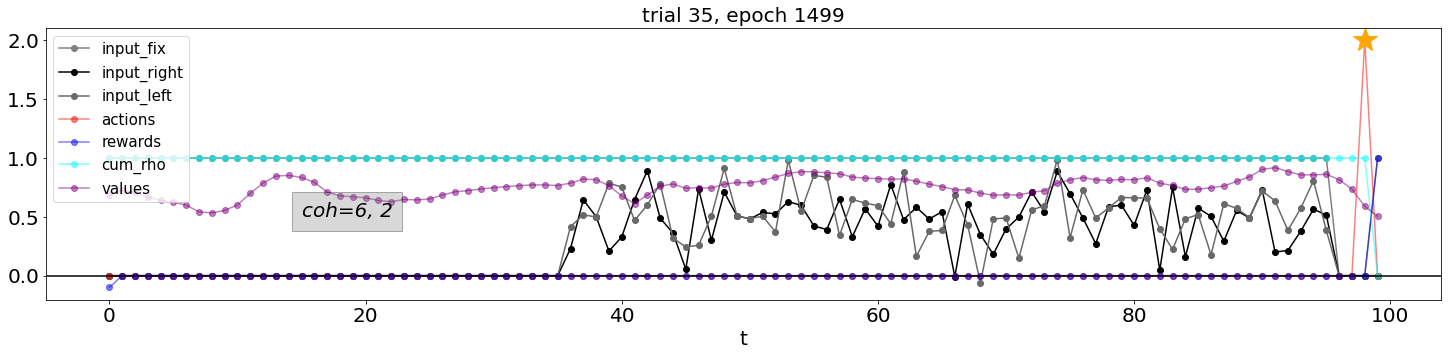

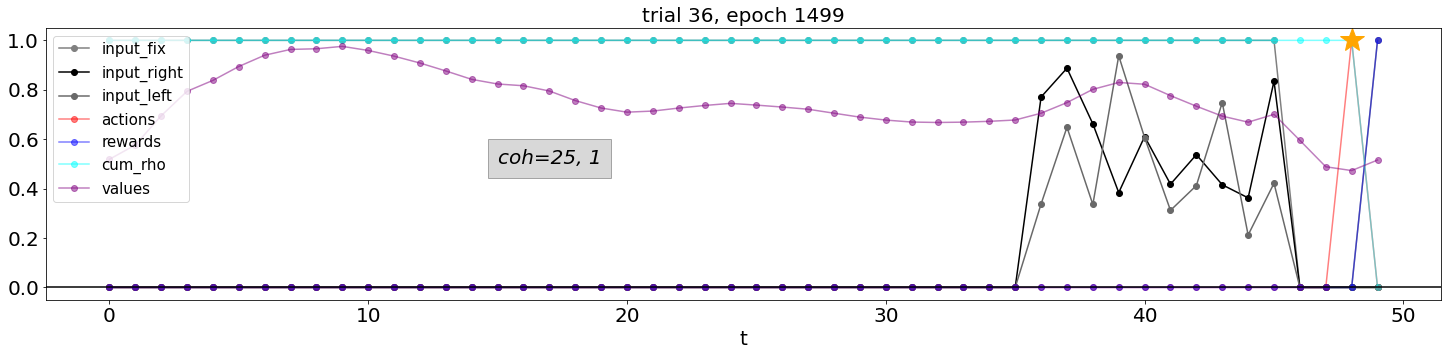

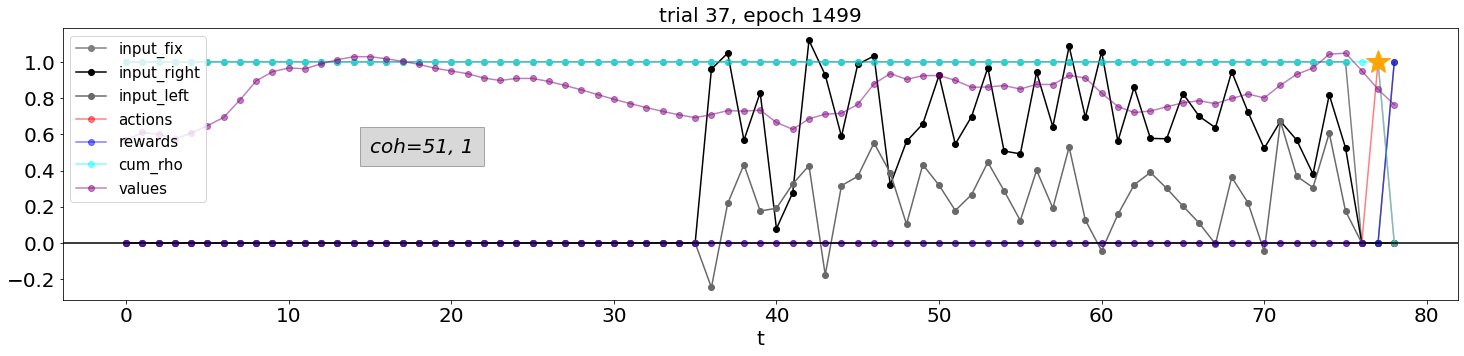

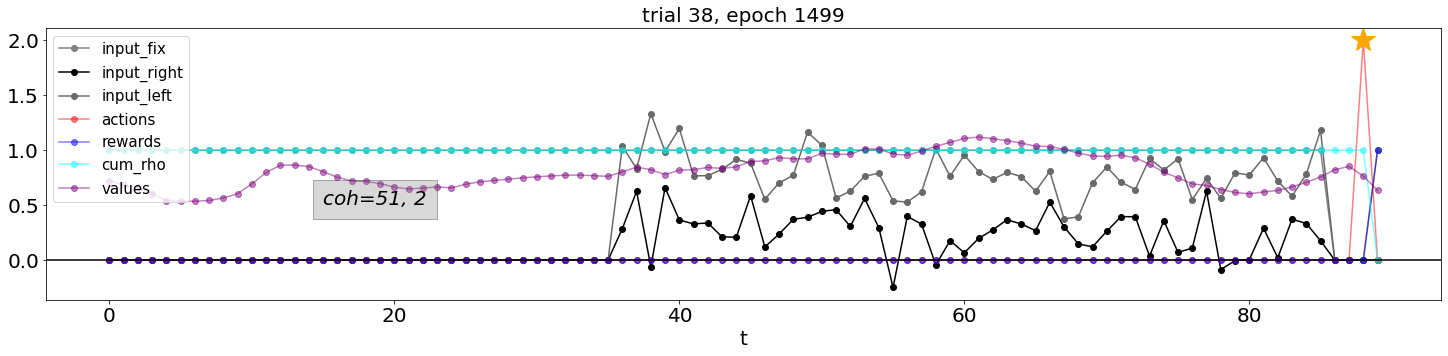

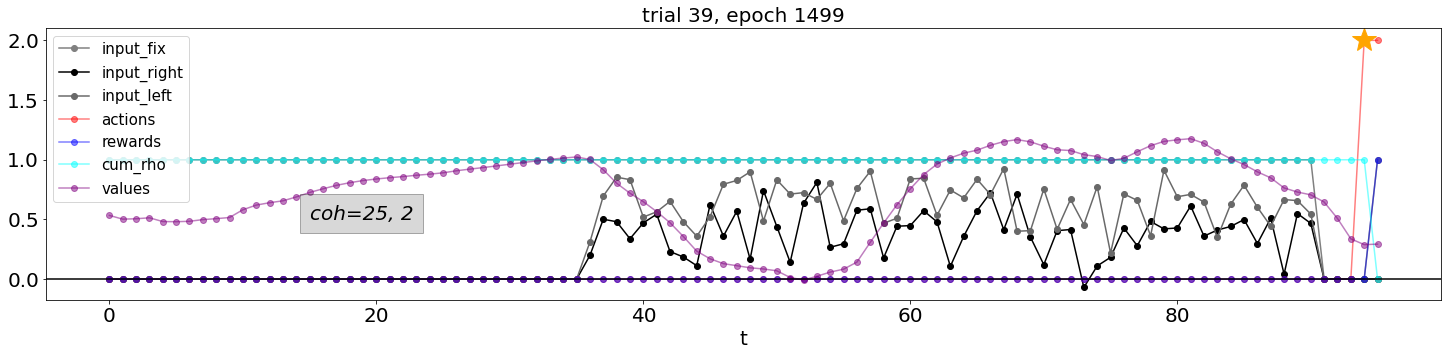

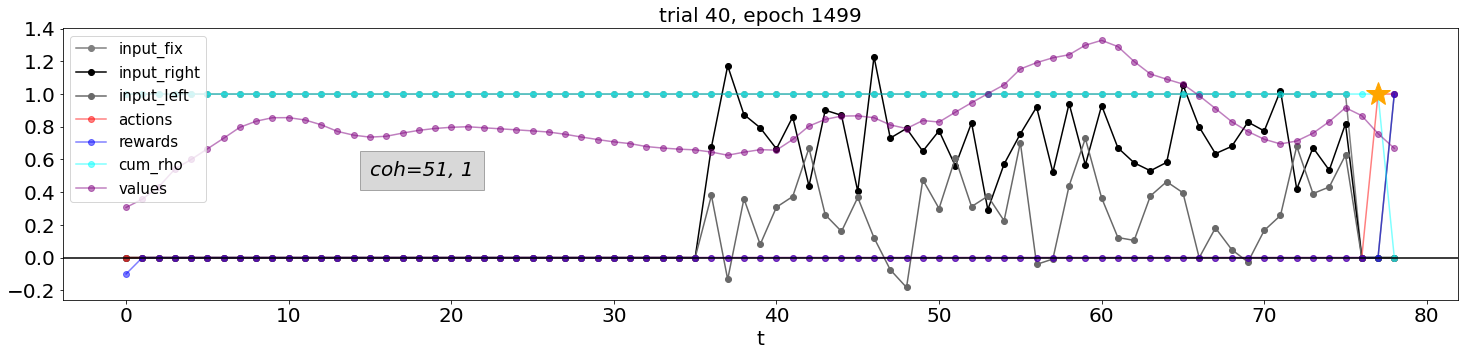

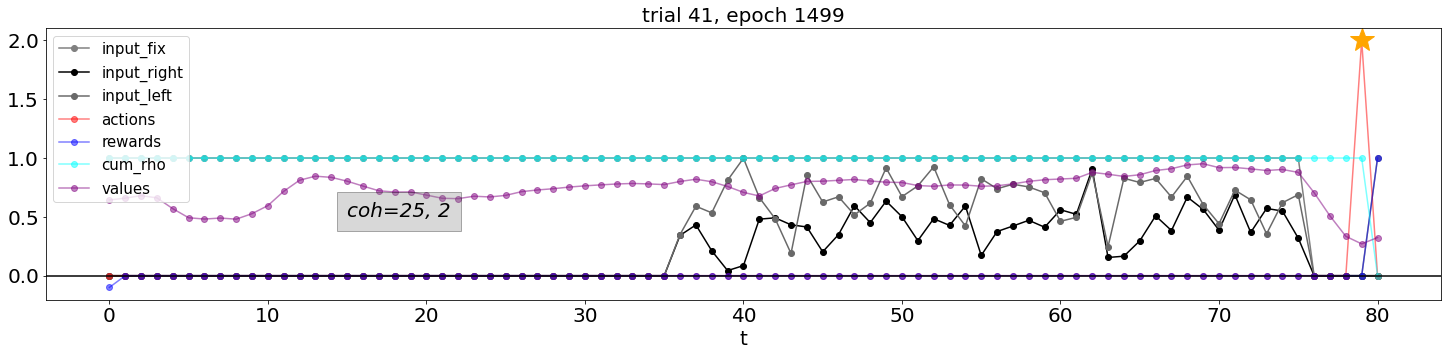

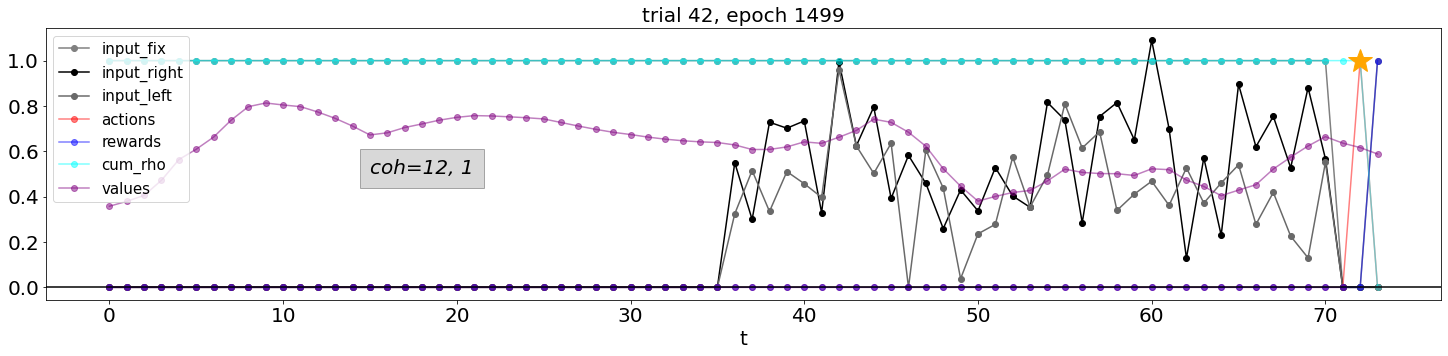

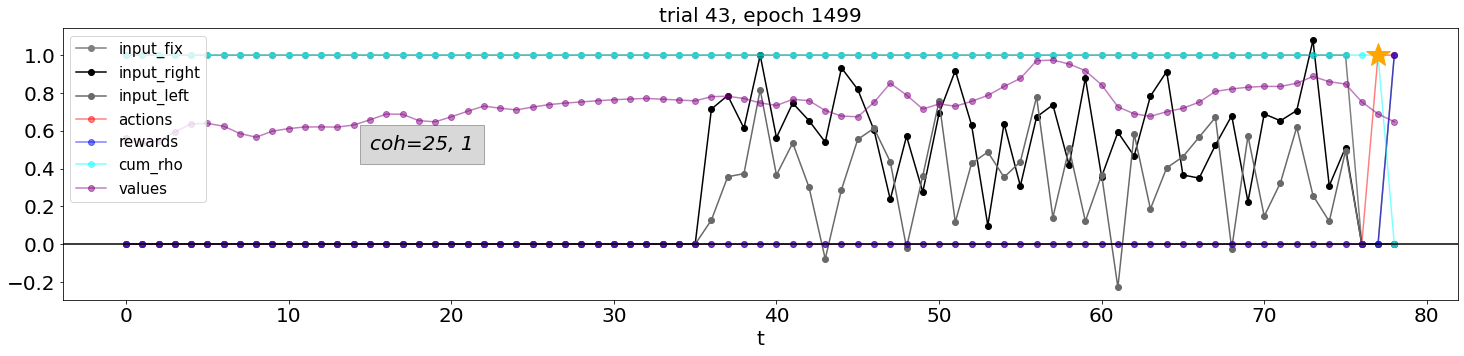

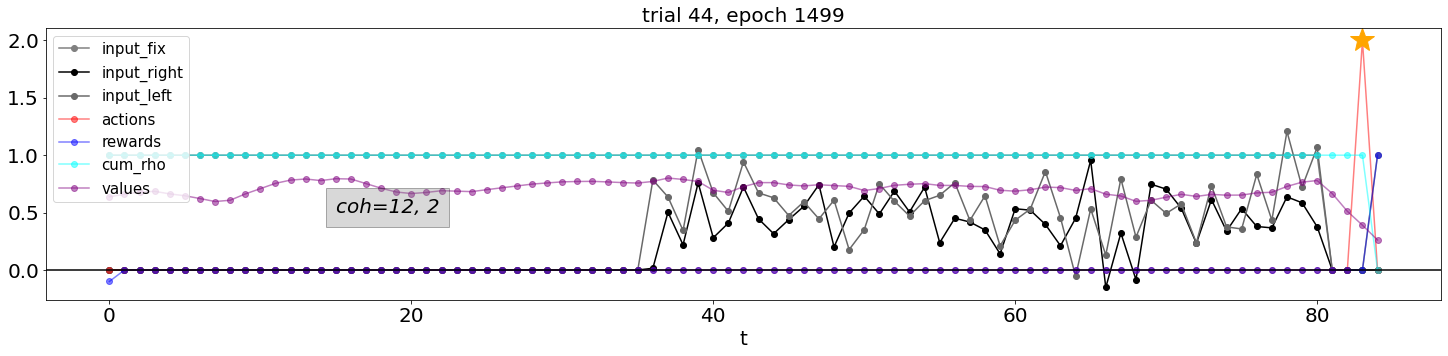

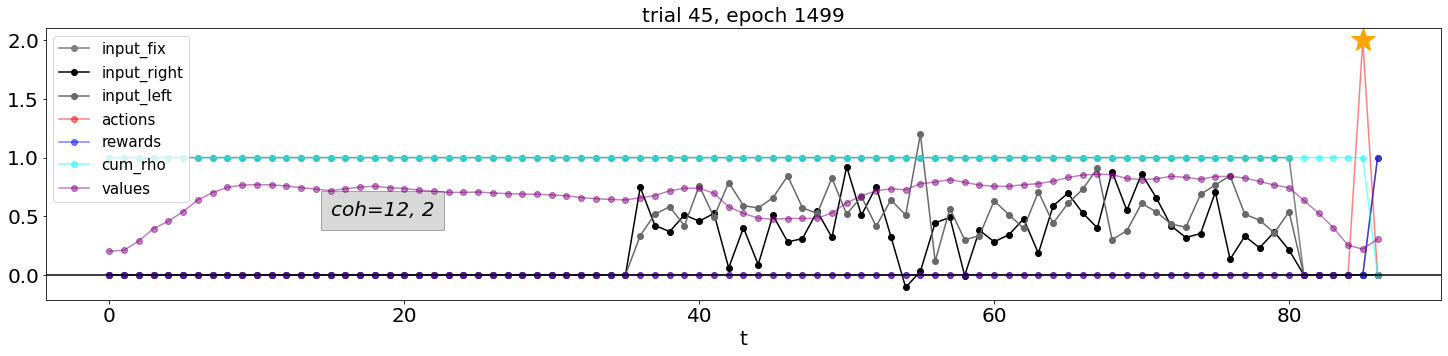

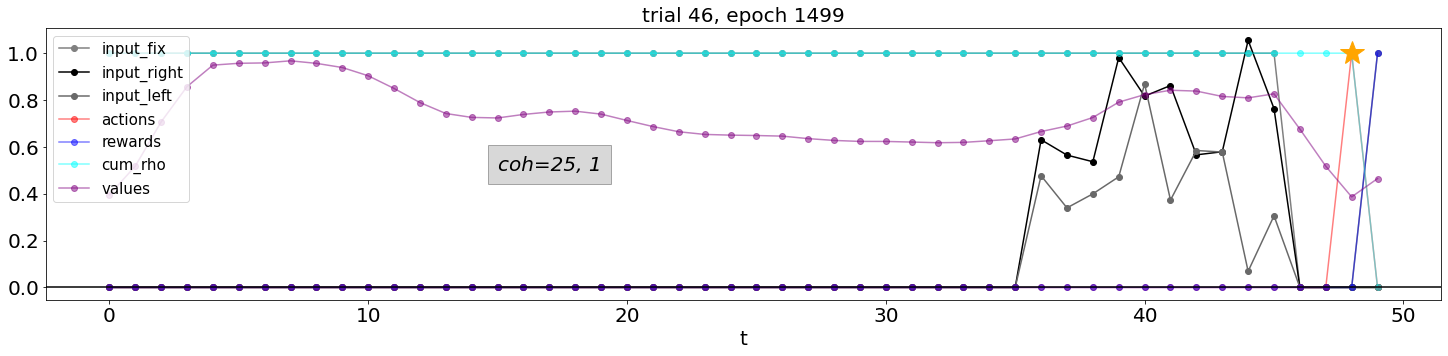

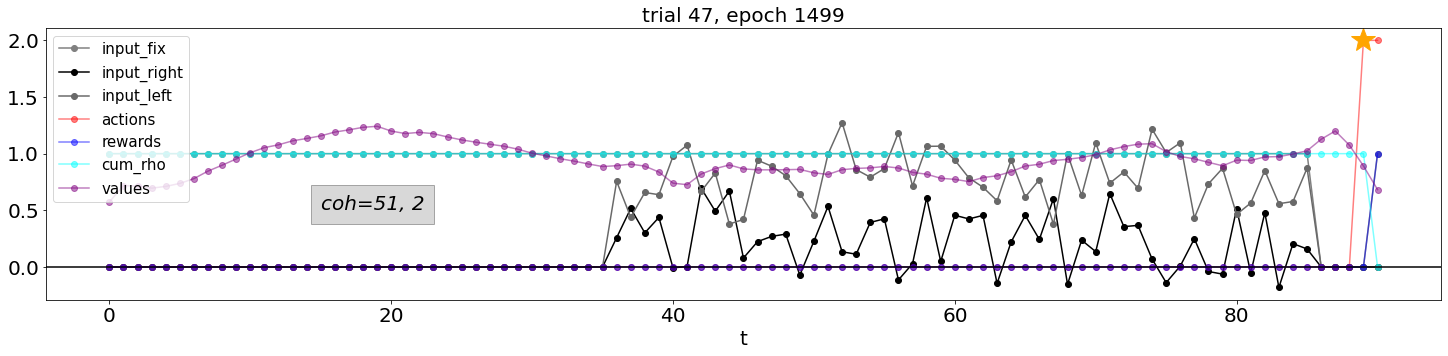

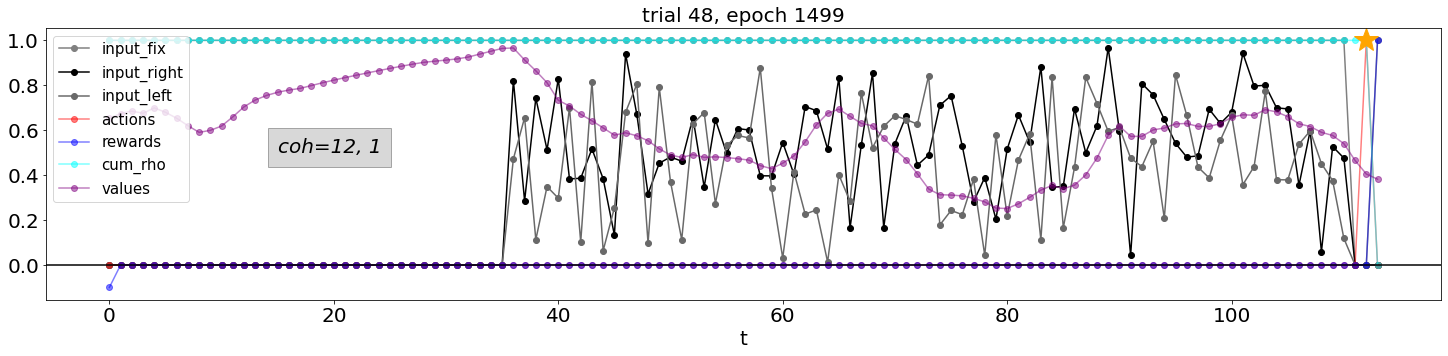

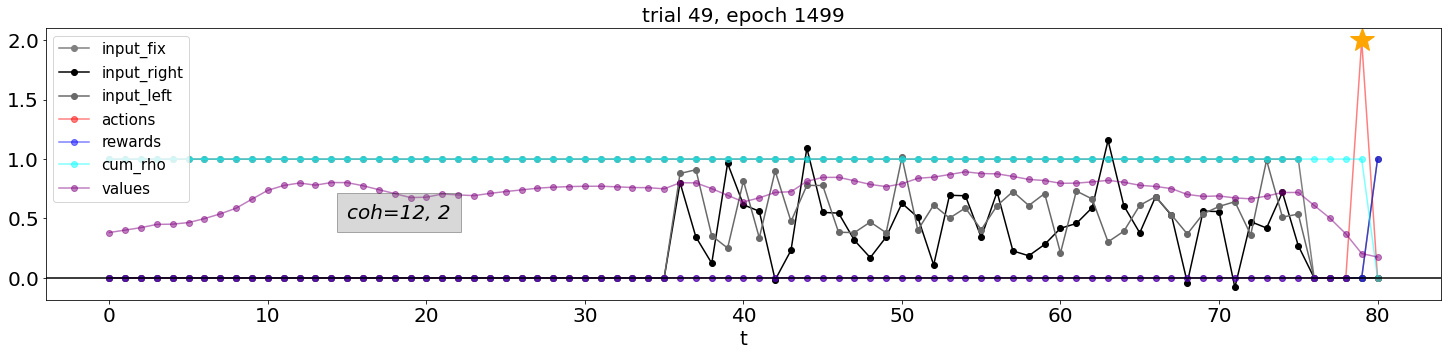

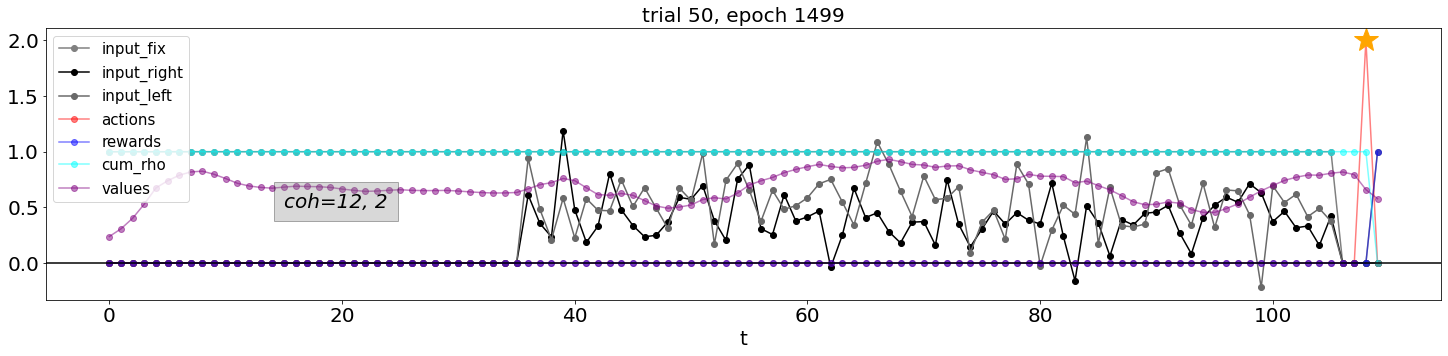

In [2]:
#torch.autograd.set_detect_anomaly(True)
importlib.reload(rln)
reinforce = rln.REINFORCE(name_load_actor="models/FullRankRNN.pt") 
#reinforce.critic_network.wi.data *= 1
iterations = 1500
n_trs = 50
actor_rewards, critic_losses, errors, coh_info, wi, wo = reinforce.training(n_trs=n_trs, iterations=iterations, lr_a=1e-4, lr_c=1e-4)

<ipython-input-3-e13477708e7f>:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25,5))


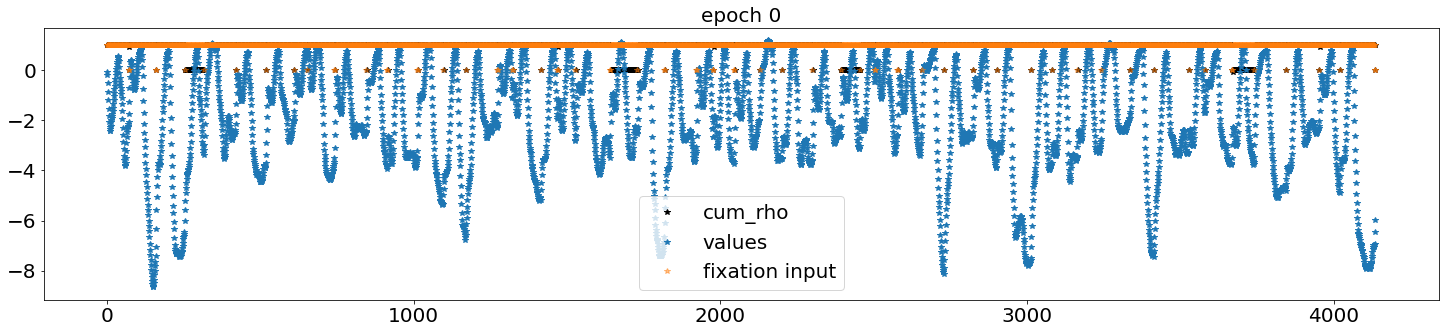

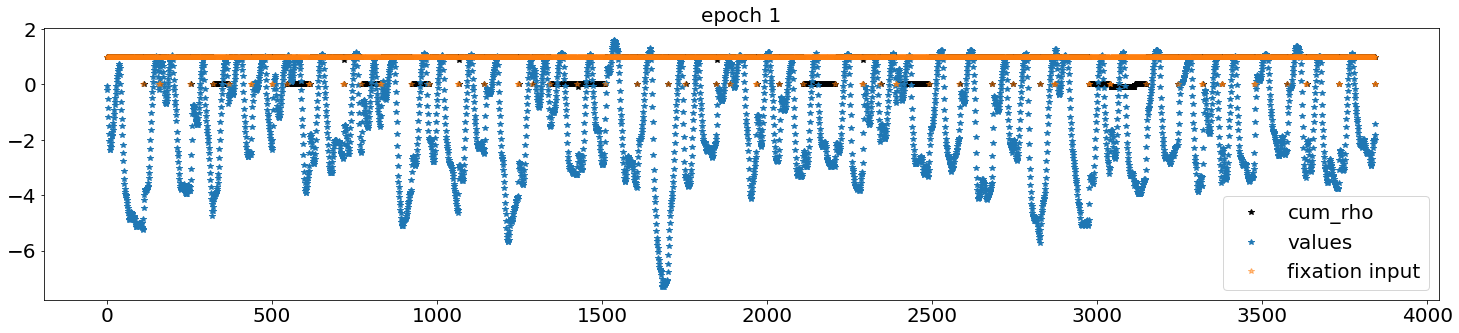

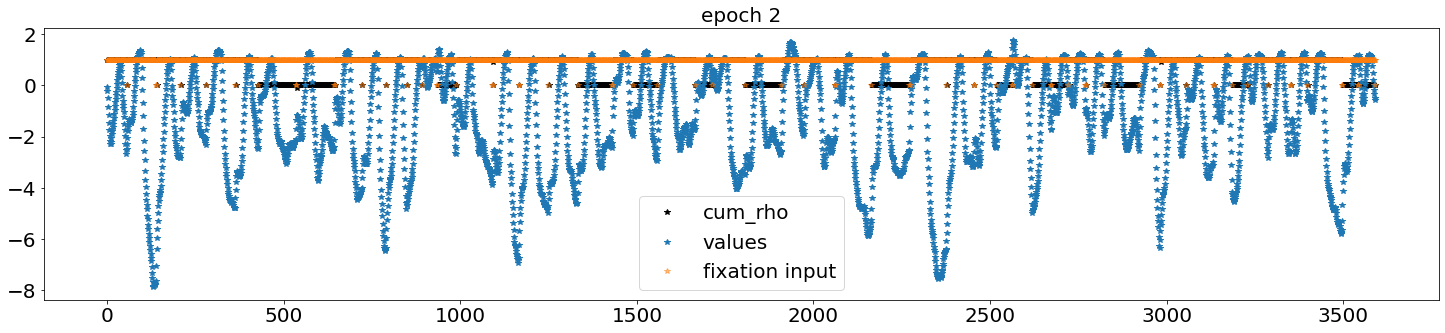

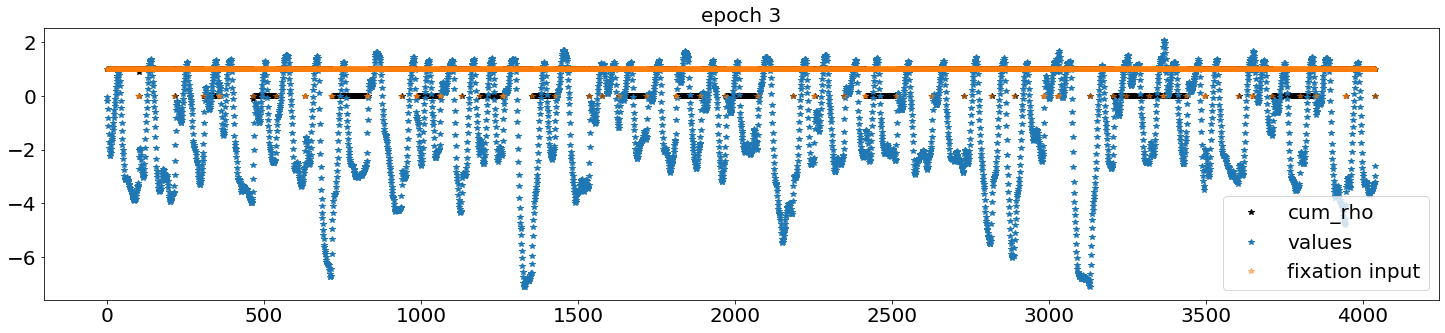

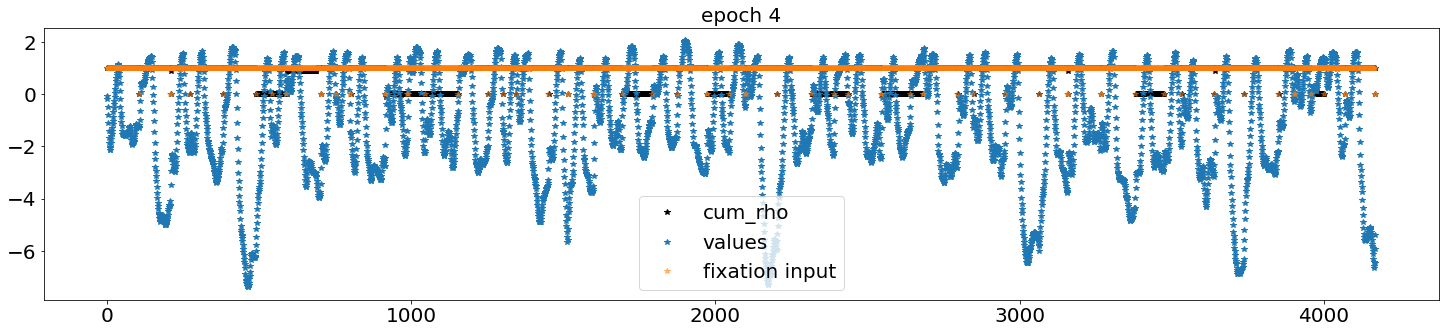

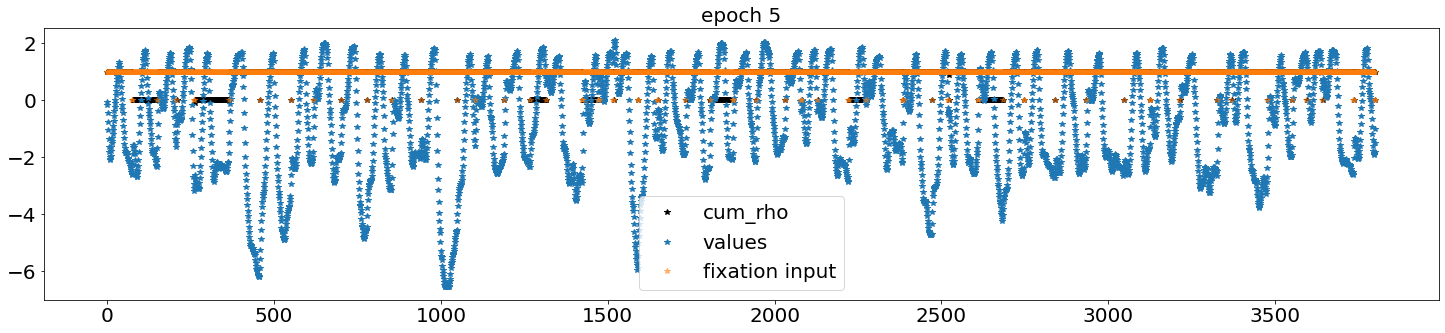

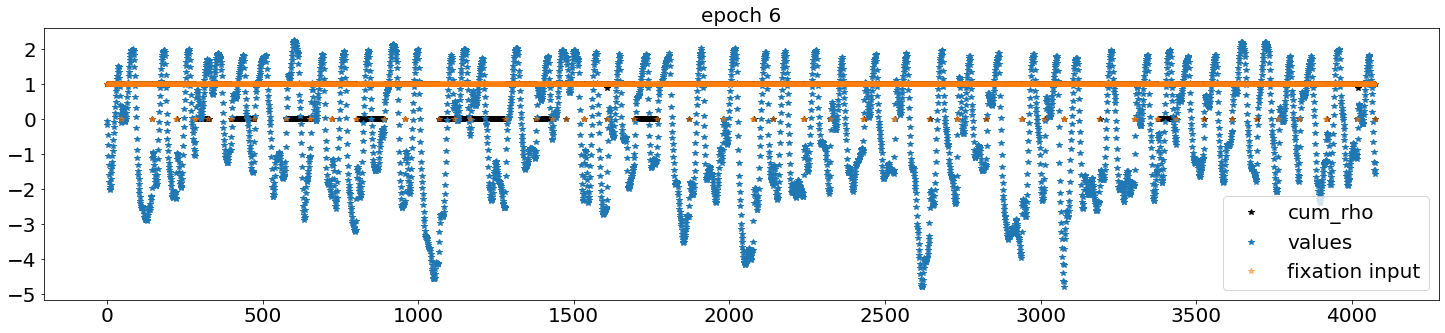

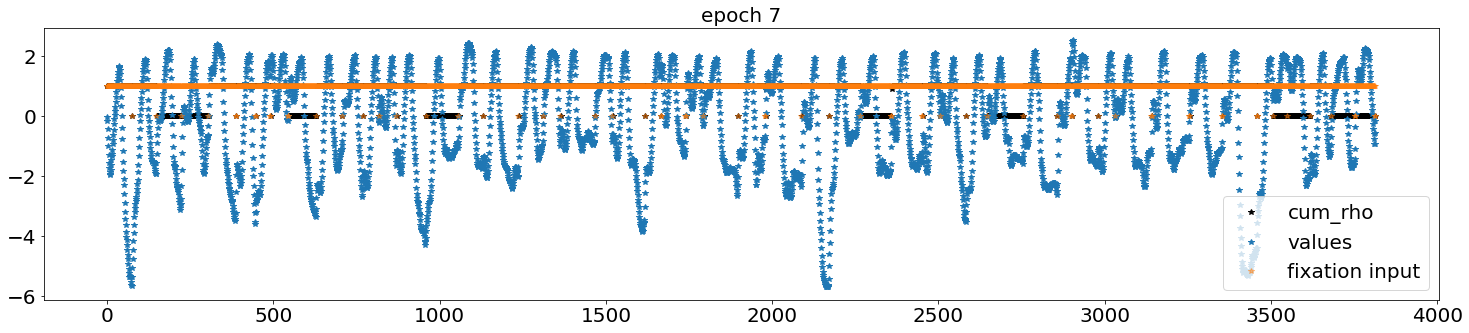

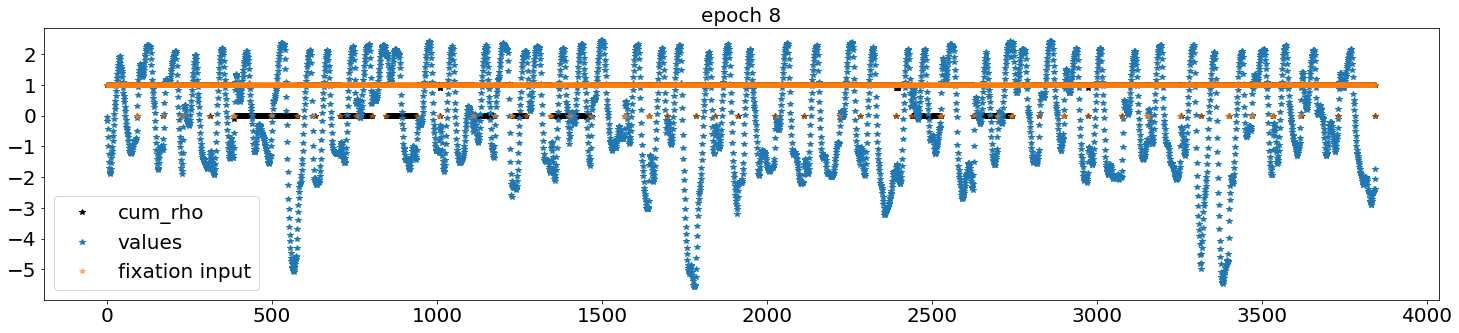

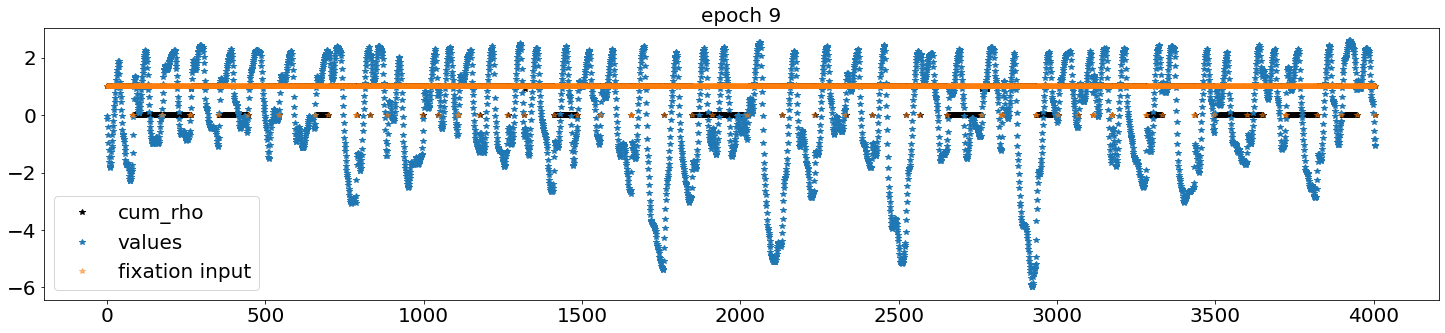

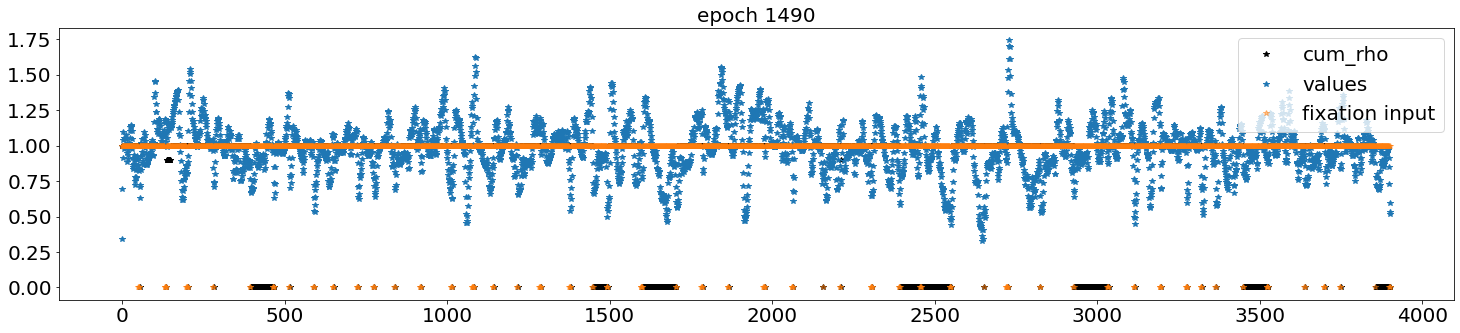

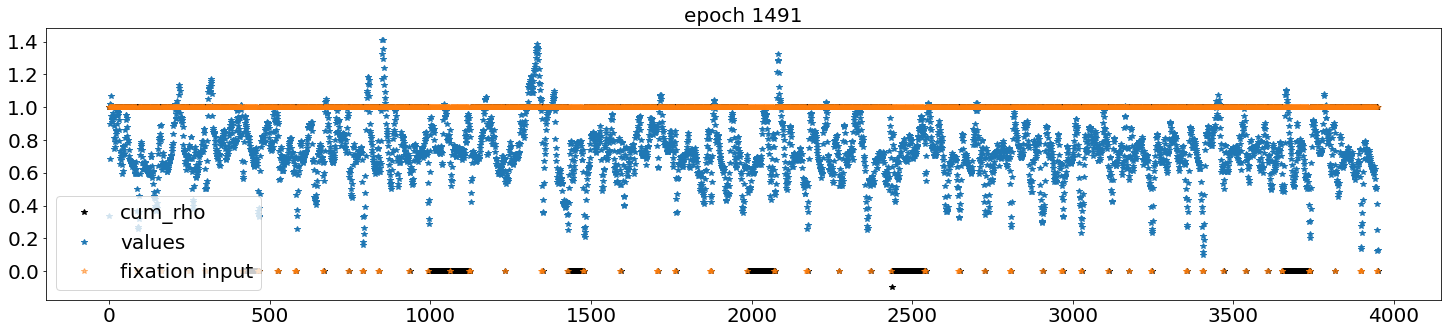

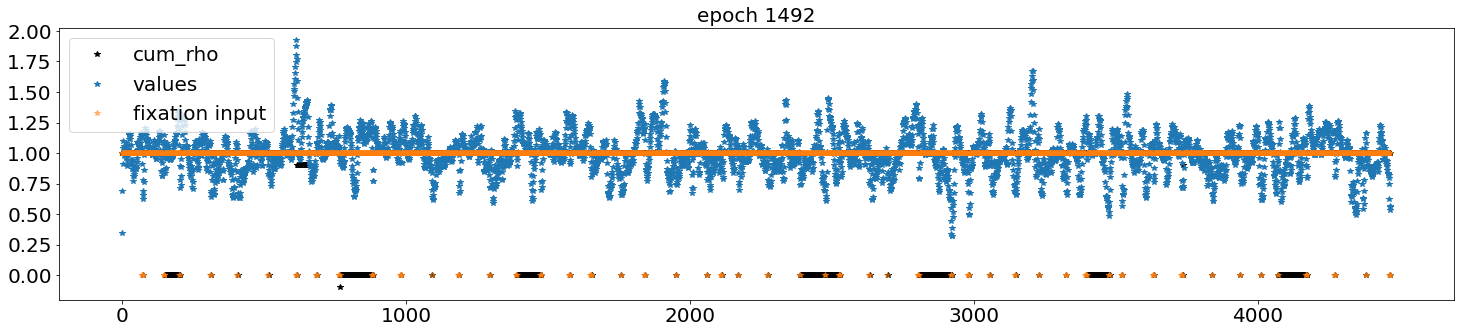

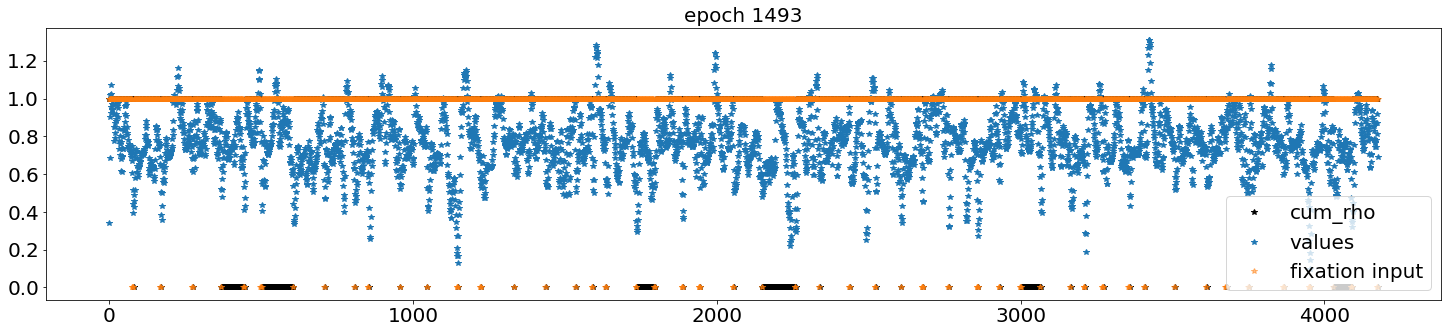

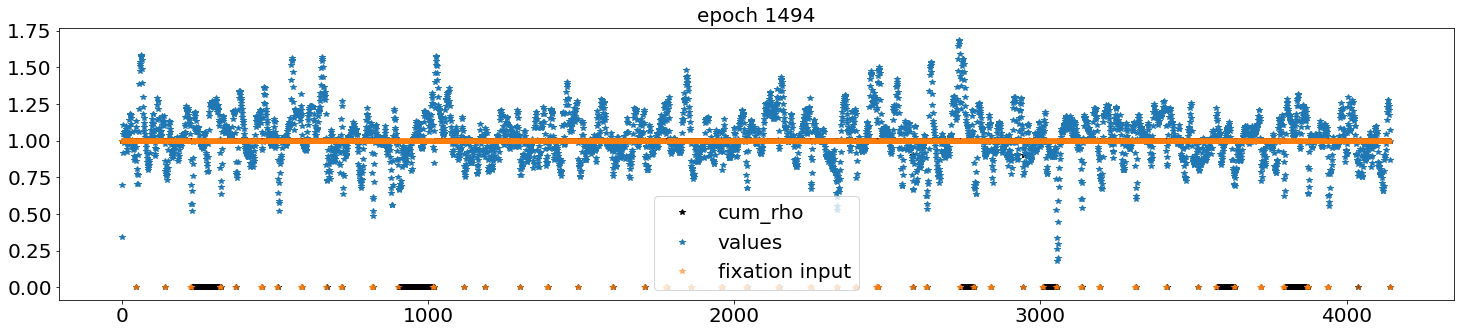

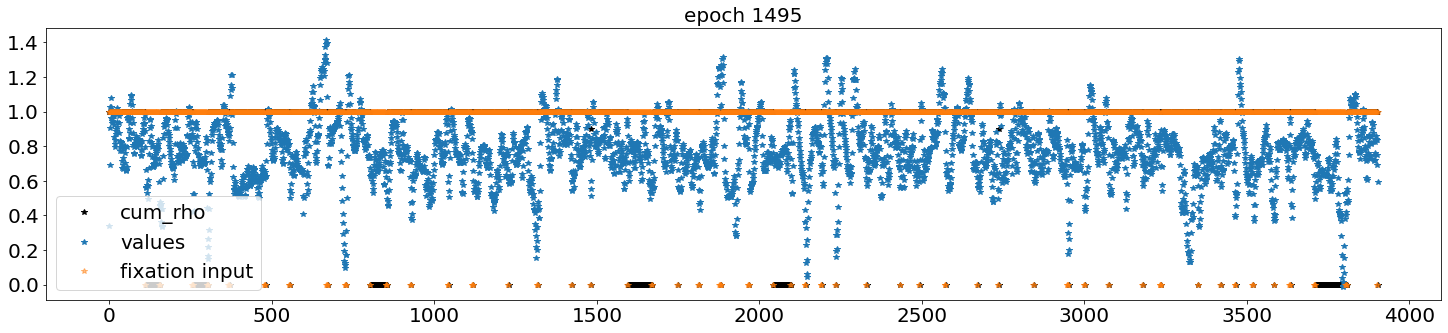

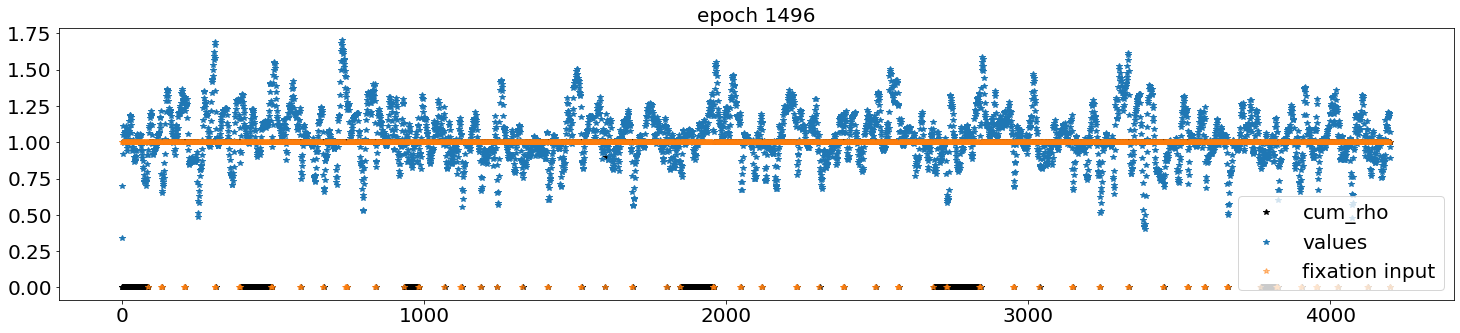

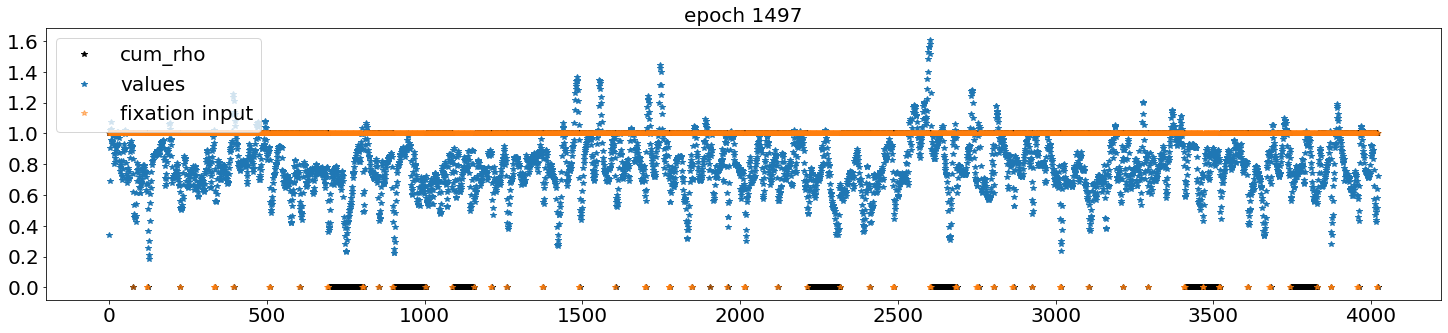

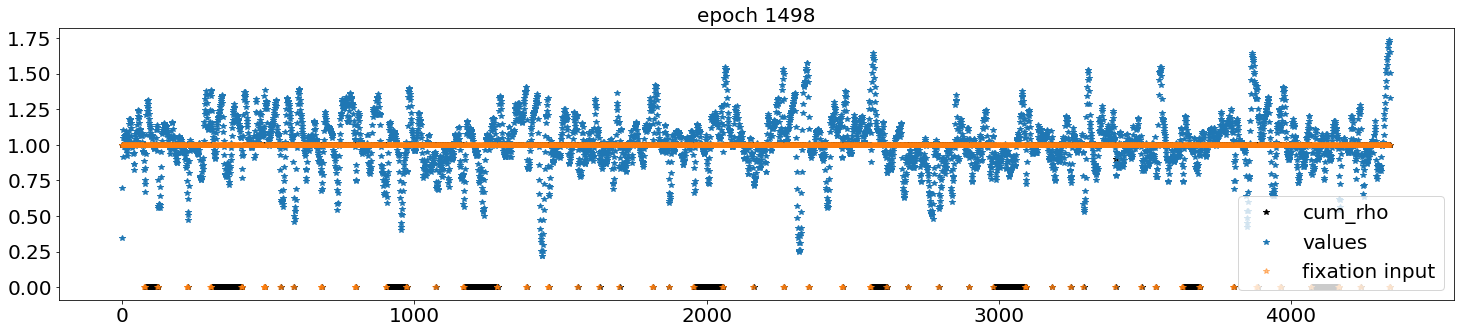

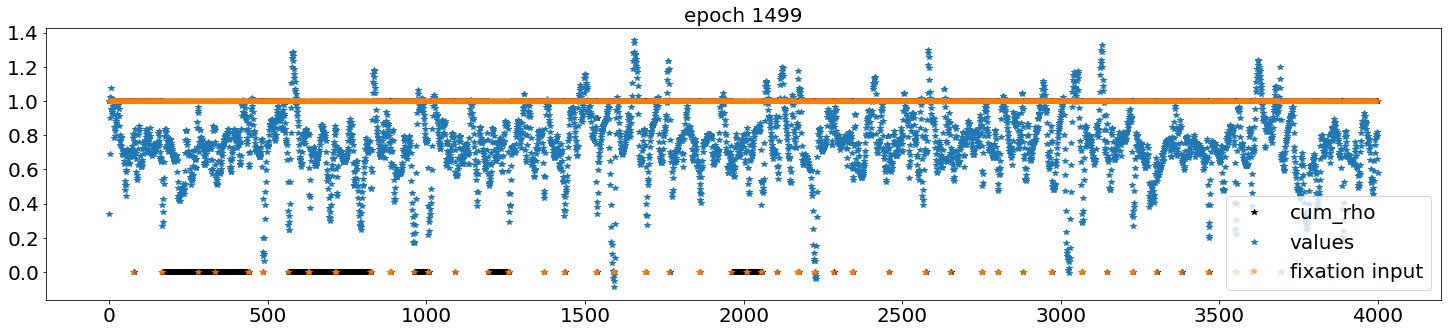

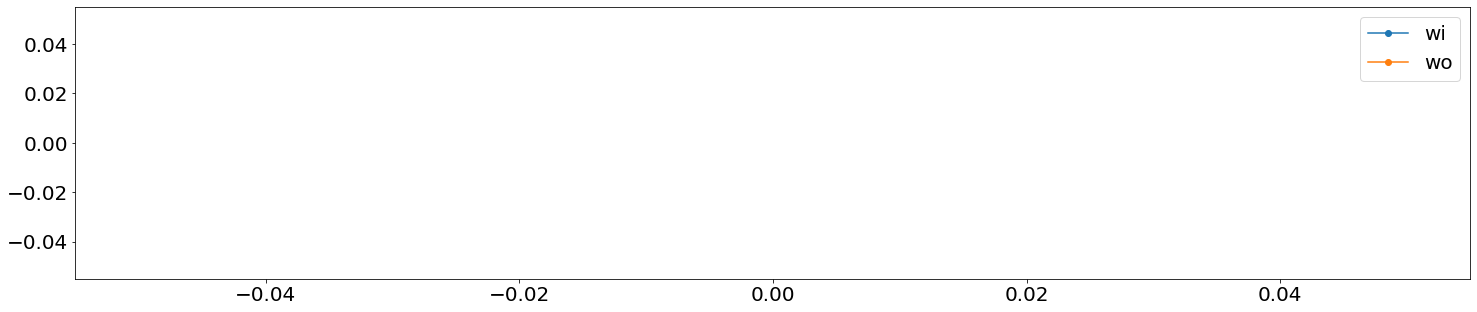

In [3]:
qui=np.linspace(iterations-10, iterations-1, 10, dtype=int)
for epoch in range(10):
    cum_rho=torch.load("debug_data/cum_rho"+str(epoch)+".pt")
    values=torch.load("debug_data/values"+str(epoch)+".pt")
    observations=torch.load("debug_data/observations"+str(epoch)+".pt")
    #print(observations.T)
    plt.figure(figsize=(25,5))

    plt.plot(cum_rho, '*', label="cum_rho", color="black")
    plt.plot(values.detach().numpy(), '*', label="values")
    plt.plot(observations.T[0], '*', label="fixation input", alpha=0.5)

    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.legend(fontsize=20)
    plt.title("epoch "+str(epoch), fontsize=20)

for epoch in qui:
    cum_rho=torch.load("debug_data/cum_rho"+str(epoch)+".pt")
    values=torch.load("debug_data/values"+str(epoch)+".pt")
    observations=torch.load("debug_data/observations"+str(epoch)+".pt")
    #print(observations)
    plt.figure(figsize=(25,5))

    plt.plot(cum_rho, '*', label="cum_rho", color="black")
    plt.plot(values.detach().numpy(), '*', label="values")
    plt.plot(observations.T[0], '*', label="fixation input", alpha=0.5)

    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.legend(fontsize=20)
    plt.title("epoch "+str(epoch), fontsize=20)

plt.figure(figsize=(25,5))
plt.plot(wi, 'o-', label="wi")
plt.plot(wo, 'o-', label="wo")
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20);


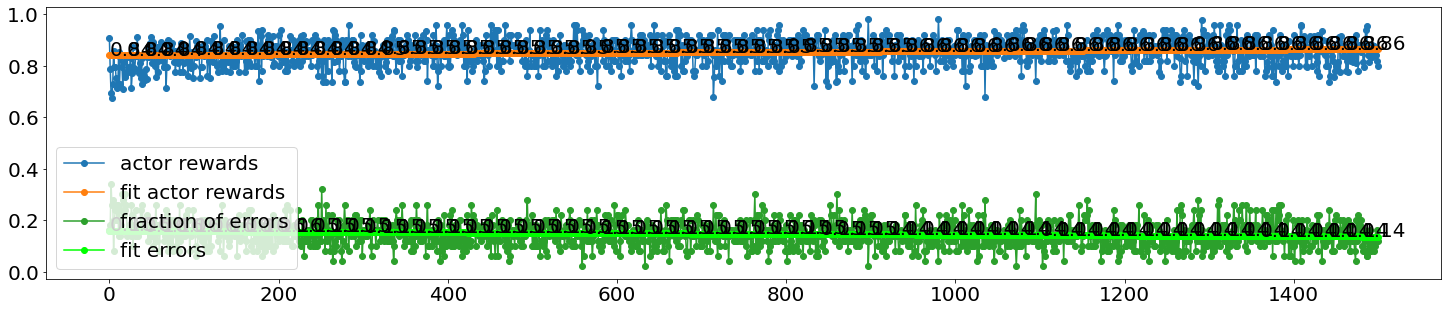

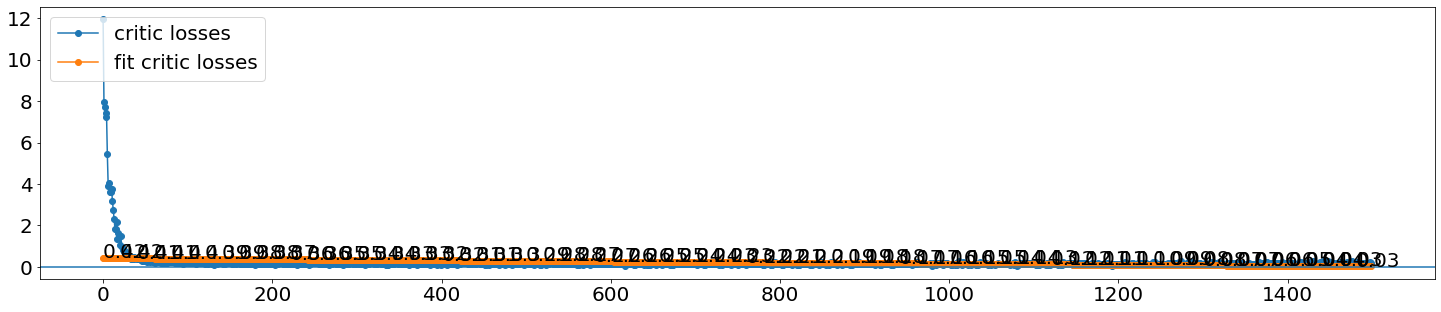

In [4]:
plt.figure(figsize=(25,5))

length = np.linspace(0,iterations-1,iterations)
fit = np.polyfit(length, actor_rewards, 1)
fit3 = np.polyfit(length, errors, 1)

plt.plot(length, actor_rewards, "-o", label="actor rewards")
plt.plot(length, fit[1]+length*fit[0], "-o", label="fit actor rewards")
plt.plot(length, errors, "-o", label="fraction of errors")
plt.plot(length, fit3[1]+length*fit3[0], "-o", label="fit errors", color="lime")

for i in range(int(len(errors)/20)):
    plt.text(length[20*i], fit[1]+length[20*i]*fit[0], str(round(fit[1]+length[20*i]*fit[0], 2)), fontsize=20, color="black")
    plt.text(length[20*i], fit3[1]+length[20*i]*fit3[0], str(round(fit3[1]+length[20*i]*fit3[0], 2)), fontsize=20, color="black")
    
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20, loc="lower left");


plt.figure(figsize=(25,5))

length = np.linspace(0,iterations-1,iterations)
fit2 = np.polyfit(length, critic_losses, 1)

plt.plot(length, critic_losses, "-o", label="critic losses")
plt.plot(length, fit2[1]+length*fit2[0], "-o", label="fit critic losses")
plt.axhline(0)

for i in range(int(len(errors)/20)):
    plt.text(length[20*i], fit2[1]+length[20*i]*fit2[0], str(round(fit2[1]+length[20*i]*fit2[0], 2)), fontsize=20, color="black")

plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(0,0.5)
plt.legend(fontsize=20, loc="upper left");

In [13]:
#importlib.reload(rln)
#reinforce2 = rln.REINFORCE(name_load="models/FullRankRNN.pt")
observations, rewards, actions, log_probs, values, trial_begins, gt, coh, avarage_error, inputs = reinforce.experience(50)
obs = observations.T

In [14]:
positive_coh = []
negative_coh = []
saved_index = []

for i in range(50):
    
    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])
    
    if len(actions[start:stop]) >= 80 and i < 49:
        if gt[i] == 1:
            positive_coh.append(i)
        else:
            negative_coh.append(i)
p_0=0
p_6=0
p_12=0
p_25=0
p_51=0
n_0=0
n_6=0
n_12=0
n_25=0
n_51=0          
print(positive_coh, negative_coh)

for i in range(len(positive_coh)):
    if coh[positive_coh[i]] == 0:
        p_0 = positive_coh[i]
    elif coh[positive_coh[i]] == 6.4:
        p_6 = positive_coh[i]
    elif coh[positive_coh[i]] == 12.8:
        p_12 = positive_coh[i]
    elif coh[positive_coh[i]] == 25.6:
        p_25 = positive_coh[i]
    elif coh[positive_coh[i]] == 51.2:
        p_51 = positive_coh[i]
        
for i in range(len(negative_coh)):
    if coh[negative_coh[i]] == 0:
        n_0 = negative_coh[i]
    elif coh[negative_coh[i]] == 6.4:
        n_6 = negative_coh[i]
    elif coh[negative_coh[i]] == 12.8:
        n_12 = negative_coh[i]
    elif coh[negative_coh[i]] == 25.6:
        n_25 = negative_coh[i]
    elif coh[negative_coh[i]] == 51.2:
        n_51 = negative_coh[i]

saved_index=np.array([p_0,p_6,p_12,p_25,p_51,n_0,n_6,n_12,n_25,n_51])

print(p_0,p_6,p_12,p_25,p_51)
print(n_0,n_6,n_12,n_25,n_51)
print(saved_index)
#print(coh_info2["r51"], coh_info2["n51"])

[1, 14, 17, 20, 31, 34, 44, 48] [5, 8, 11, 12, 15, 16, 18, 26, 32, 33, 35, 38, 39, 42, 45]
48 0 1 44 17
42 39 38 45 35
[48  0  1 44 17 42 39 38 45 35]


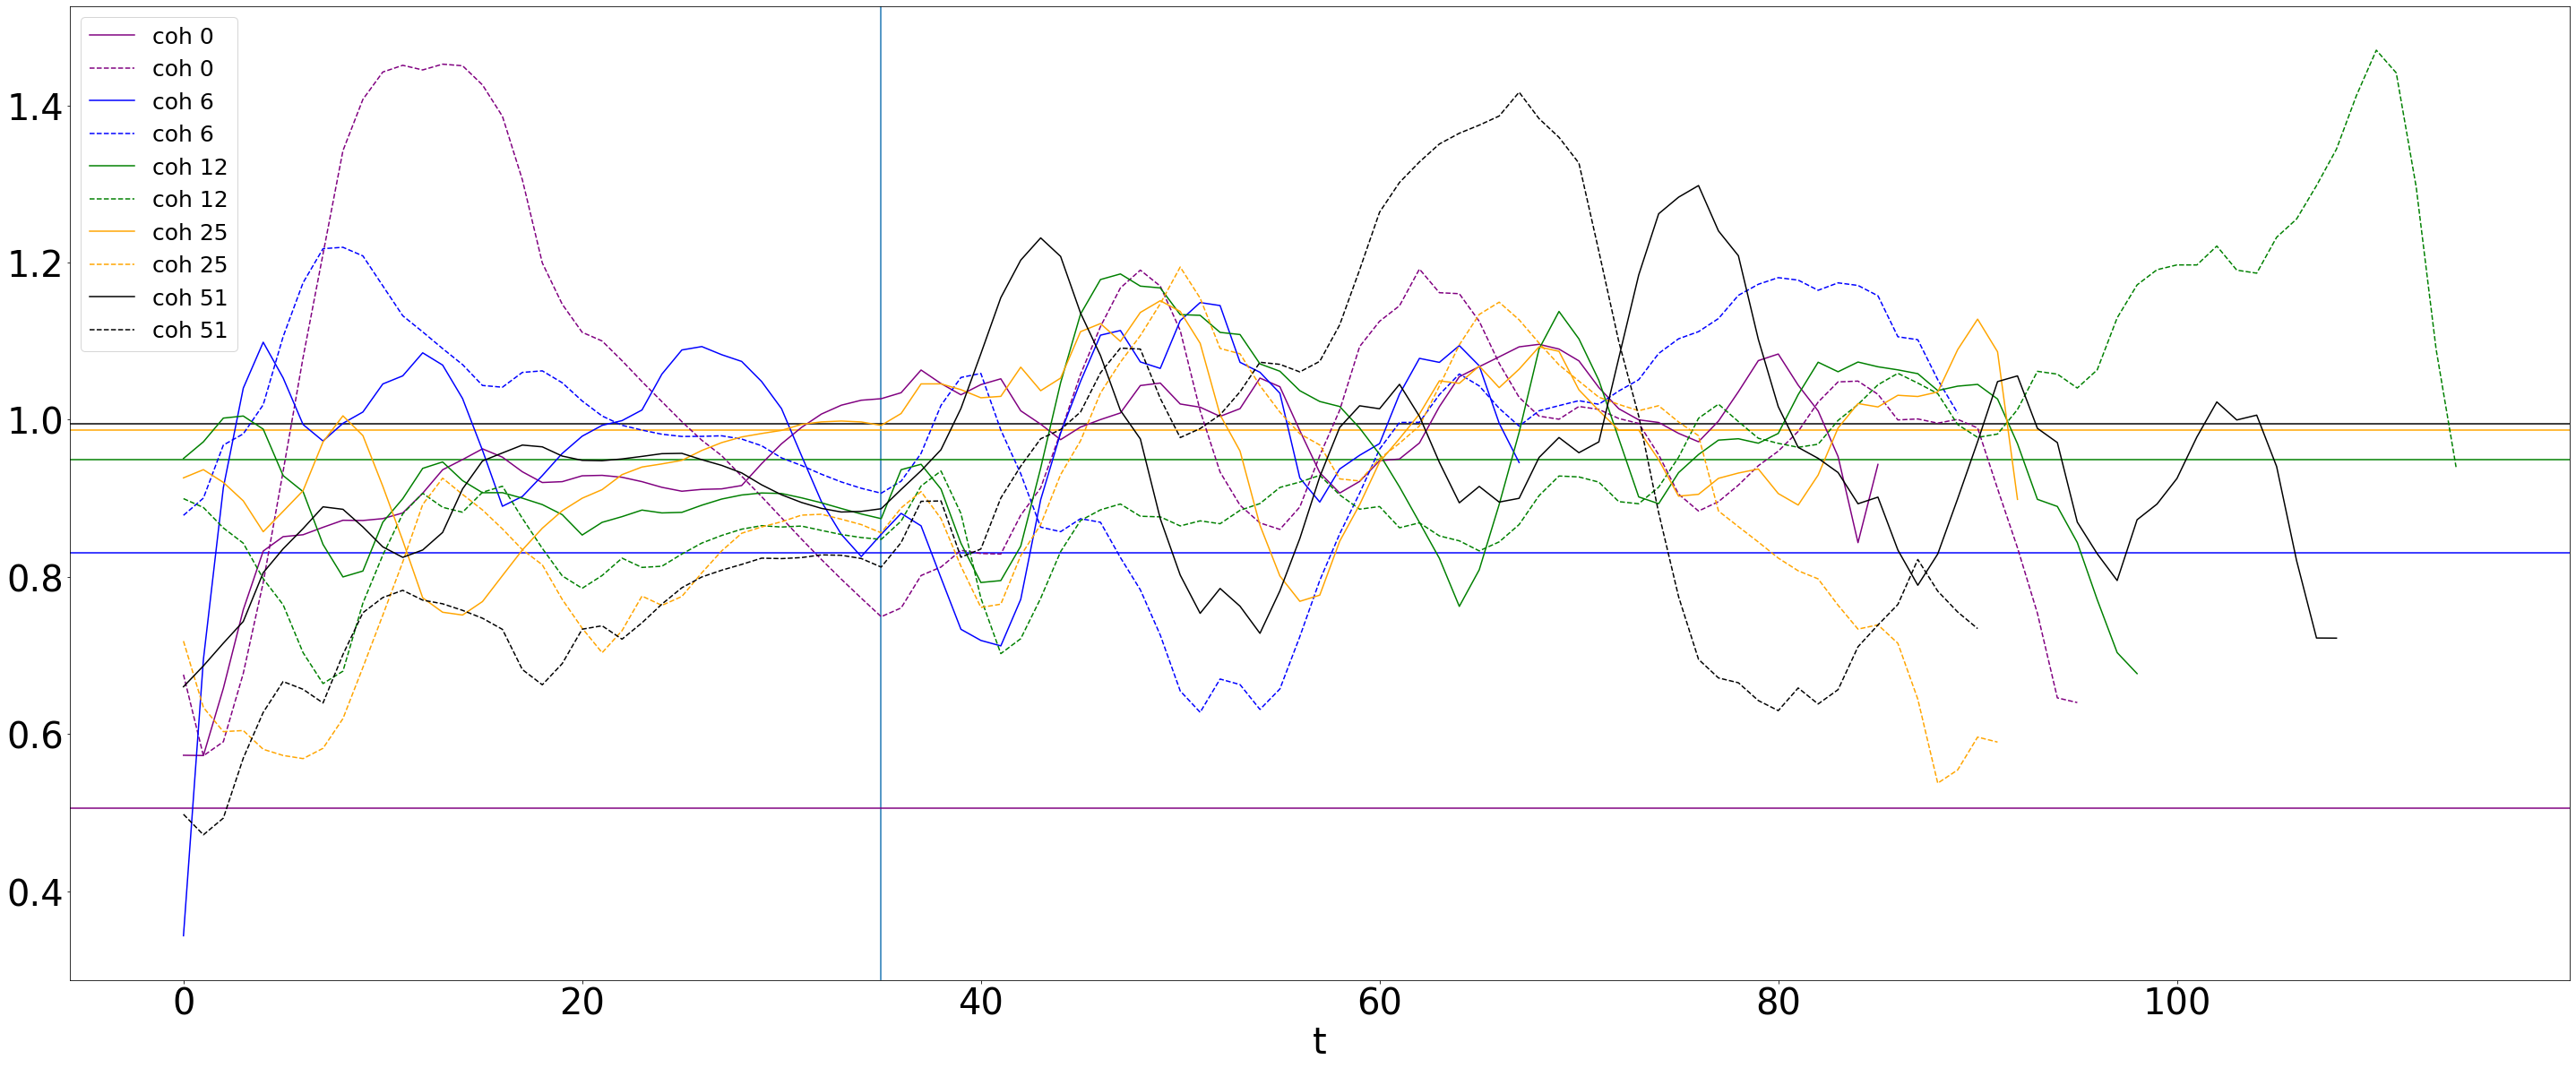

In [15]:
plt.figure(figsize=(50,20))

plt.axvline(35)
#plt.axhline(1)
plt.axhline(coh_info["r0"]/coh_info["n0"], color="purple")
plt.axhline(coh_info["r6"]/coh_info["n6"], color="blue")
plt.axhline(coh_info["r12"]/coh_info["n12"], color="green")
plt.axhline(coh_info["r25"]/coh_info["n25"], color="orange")
plt.axhline(coh_info["r51"]/coh_info["n51"], color="black")
plt.plot(values.clone().detach().numpy()[trial_begins[p_0]:trial_begins[p_0+1]], "-", label="coh 0", color="purple")
plt.plot(values.clone().detach().numpy()[trial_begins[n_0]:trial_begins[n_0+1]], "--", label="coh 0", color="purple")
plt.plot(values.clone().detach().numpy()[trial_begins[p_6]:trial_begins[p_6+1]], "-", label="coh 6", color="blue")
plt.plot(values.clone().detach().numpy()[trial_begins[n_6]:trial_begins[n_6+1]], "--", label="coh 6", color="blue")
plt.plot(values.clone().detach().numpy()[trial_begins[p_12]:trial_begins[p_12+1]], "-", label="coh 12", color="green")
plt.plot(values.clone().detach().numpy()[trial_begins[n_12]:trial_begins[n_12+1]], "--", label="coh 12", color="green")
plt.plot(values.clone().detach().numpy()[trial_begins[p_25]:trial_begins[p_25+1]], "-", label="coh 25", color="orange")
plt.plot(values.clone().detach().numpy()[trial_begins[n_25]:trial_begins[n_25+1]], "--", label="coh 25", color="orange")
plt.plot(values.clone().detach().numpy()[trial_begins[p_51]:trial_begins[p_51+1]], "-", label="coh 51", color="black")
plt.plot(values.clone().detach().numpy()[trial_begins[n_51]:trial_begins[n_51+1]], "--", label="coh 51", color="black")
#plt.xlim(34,44)
#plt.ylim(0.5,1.5)
plt.xlabel("t", size=40)
plt.xticks(size=40)
plt.yticks(size=40)
plt.legend(fontsize=25, loc="upper left");

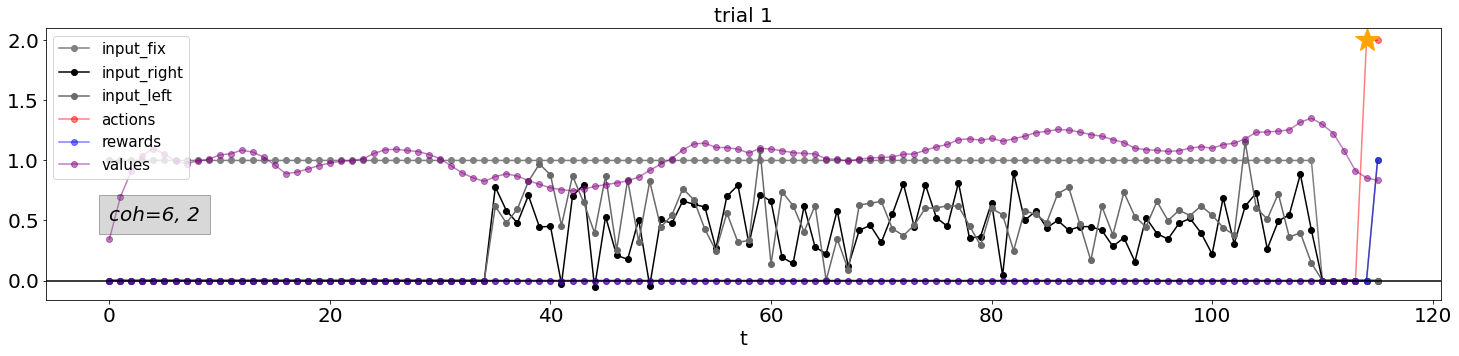

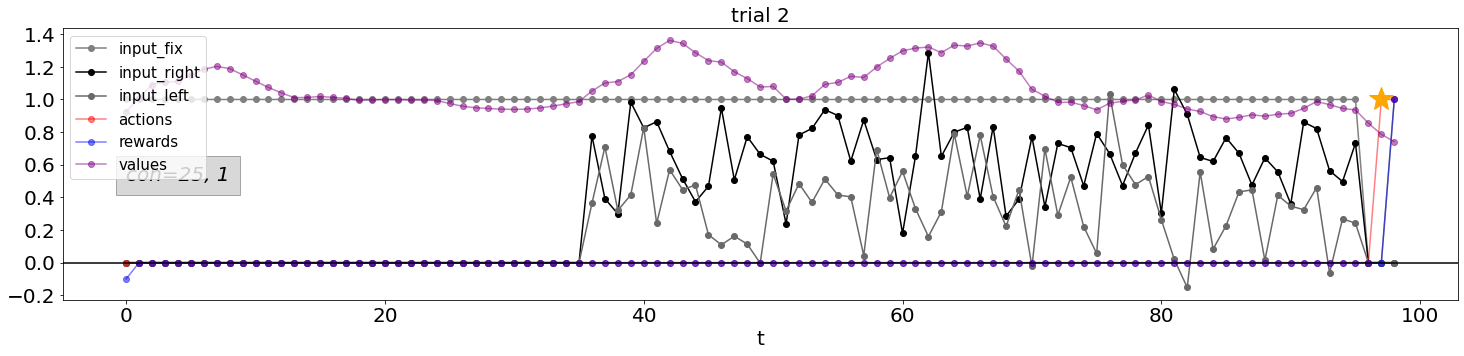

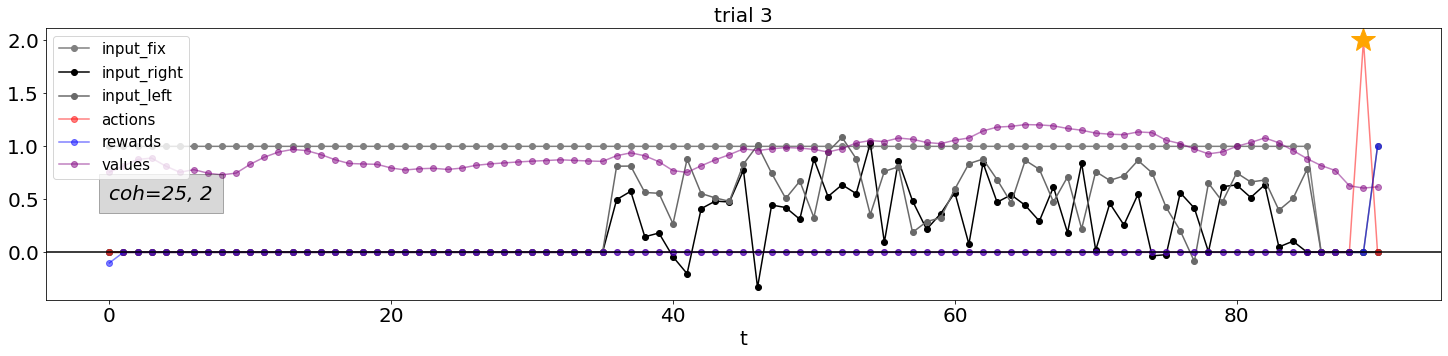

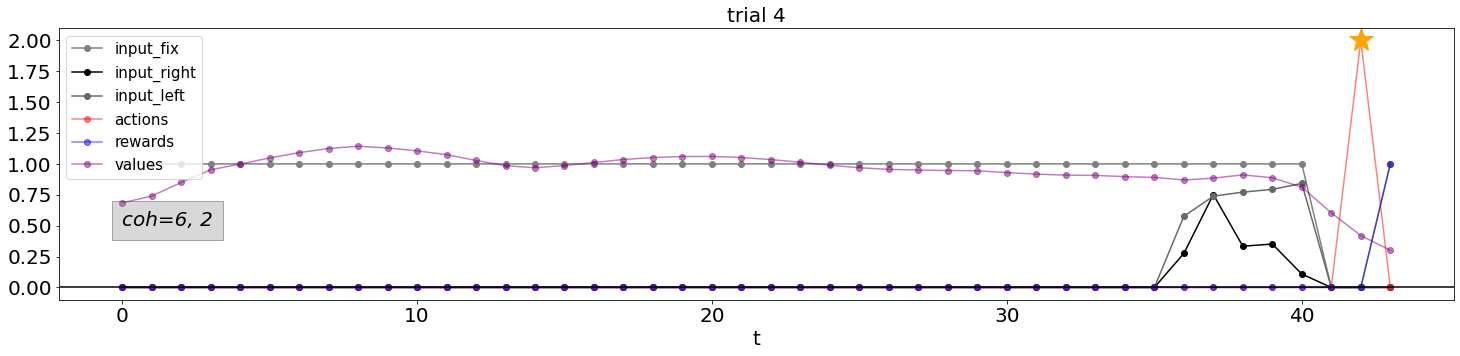

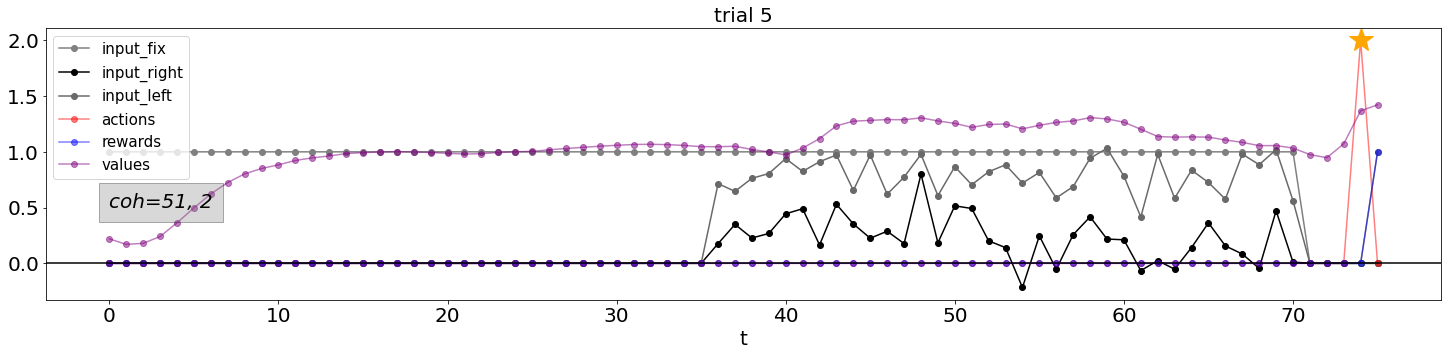

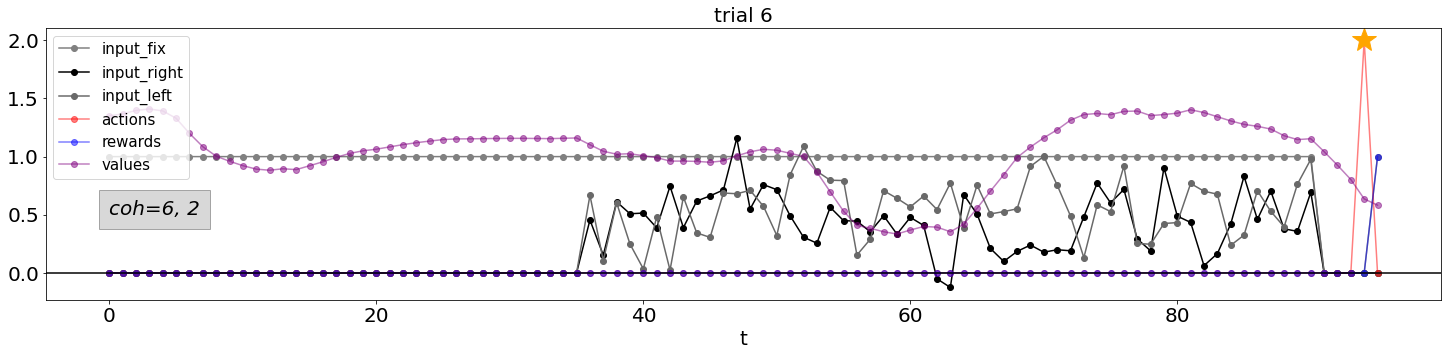

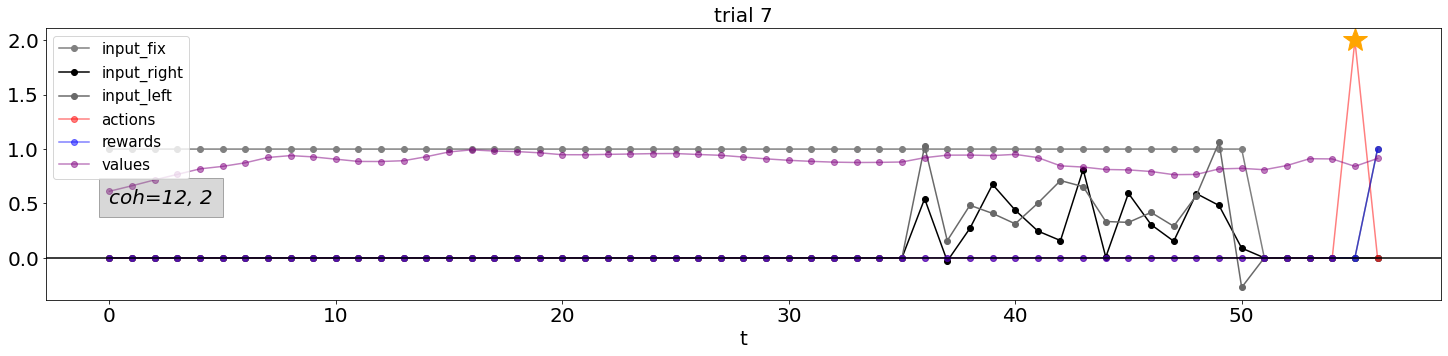

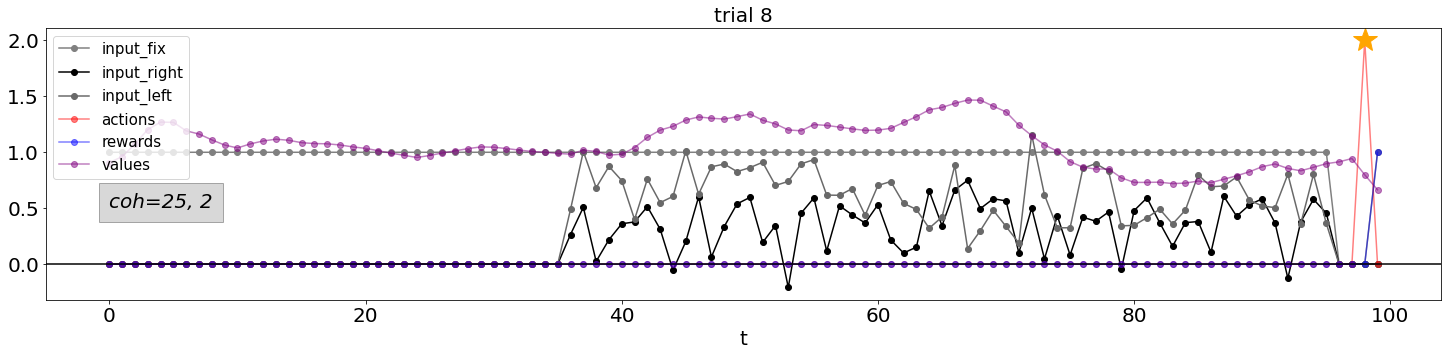

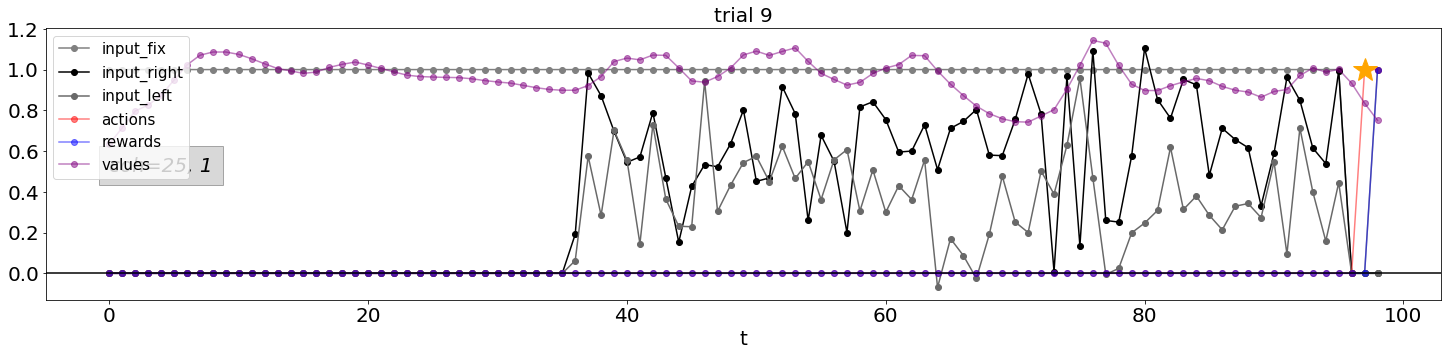

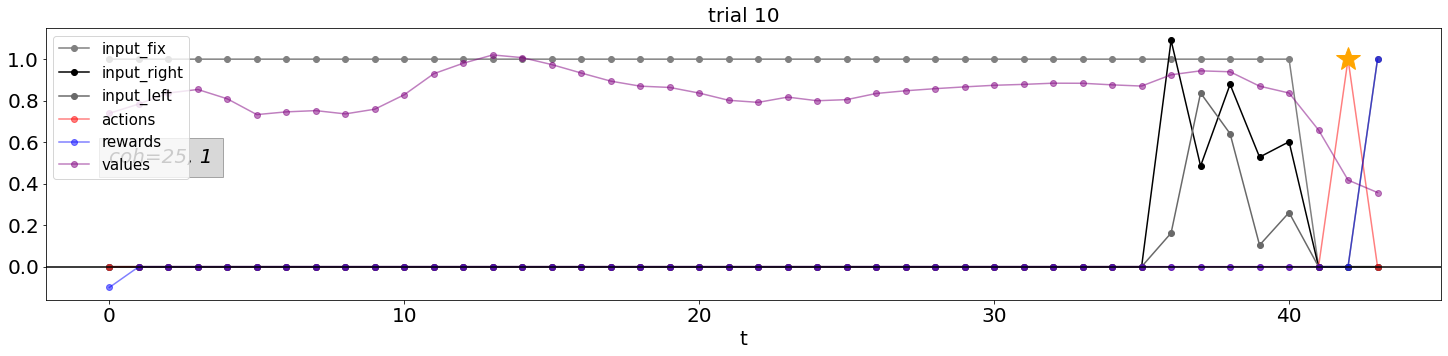

In [12]:
length = 0
for i in range(10):

    plt.figure(figsize=(25,5))

    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])

    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="input_right", color="black")
    plt.plot(obs[2][start:stop], "-o", label="input_left", color="dimgray")
    plt.plot(actions[start:stop], "-o", label="actions", color="red", alpha=0.5)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="blue", alpha=0.5)
    #plt.plot(cum_rho[start:stop], "-o", label="cum_rho", color="cyan", alpha=0.5)
    plt.plot(values.clone().detach().numpy()[start:stop], "-o", label="values", color="purple", alpha=0.5)
    plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    plt.axhline(0, color="black")
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    plt.text(0, 0.5, 'coh=%i, %s' %(coh[i], gt[i]), style='italic', fontsize=20, bbox={'facecolor': 'grey', 'alpha': 0.3, 'pad': 10})
    plt.legend(fontsize=15, loc="upper left");